# Introduction

## Goal

This notebook was dedicated to do a deep and thoughtful Exploratory Data Analysis (EDA) from the [American Express - Default Prediction
](https://www.kaggle.com/competitions/amex-default-prediction) competition.

This notebook delves deep into the EDA practices that made a mark in the competition, guiding many to insightful findings. Whether you're an aspiring data enthusiast or an established data professional, there are gems here for everyone.

## Data Fundamentals: Grasping the Basics.

***What is Tabular Data?***

In statistics, tabular data refers to data that is organized in a table with rows and columns. Within the table, the rows represent observations and the columns represent attributes for those observations. Tabular data refers to structured data that is organized in rows and columns, similar to what you'd find in spreadsheets or relational databases. Each row typically represents a unique record or item, and each column represents a specific attribute or field of that item. Tabular data is the simpler data you can feed to a machine learning model. It's called tabular because it can be represented in a table with rows and columns. You can think of these as Excel spreadsheets, but very common are files called CSV, which stands for comma-separated values, or TSV, which is tab-separated values. There are many other formats which have a tabular nature. Essentially, it's a file where data is organized in rows and columns. You find tables also in databases or when you have a collection of files that are all interconnected with keys that have relations with one another.


***4 Types Of Data – Nominal, Ordinal, Discrete and Continuous***

<img width="898" alt="image" src="https://github.com/eraikakou/LLMs-News/assets/28102493/f9d34524-7b1e-4ebe-bba6-258e769c8b31">


There are two types of data: **Qualitative** and **Quantitative data**, which are further classified into:

The data is classified into four categories:

1. **Nominal data**

1. **Ordinal data**

1. **Discrete data**

1. **Continuous data**

**Qualitative or Categorical Data** is data that can’t be measured or counted in the form of numbers. These types of data are sorted by category, not by number. That’s why it is also known as Categorical Data. These data consist of audio, images, symbols, or text. The gender of a person, i.e., male, female, or others, is qualitative data. The other examples of qualitative data are :

- What language do you speak
- Favorite holiday destination
- Opinion on something (agree, disagree, or neutral)
- Colors

The Qualitative data are further classified into two parts :

1. **Nominal Data:** Nominal Data is used to label variables without any order or quantitative value. The color of hair can be considered nominal data, as one color can’t be compared with another color. The name “nominal” comes from the Latin name “nomen,” which means “name.” With the help of nominal data, we can’t do any numerical tasks or can’t give any order to sort the data. These data don’t have any meaningful order; their values are distributed into distinct categories. Examples of Nominal Data :

    1. Colour of hair (Blonde, red, Brown, Black, etc.)
    1. Marital status (Single, Widowed, Married)
    1. Nationality (Indian, German, American)
    1. Gender (Male, Female, Others)
    1. Eye Color (Black, Brown, etc.)

1. **Ordinal Data:** Ordinal data have natural ordering where a number is present in some kind of order by their position on the scale. These data are used for observation like customer satisfaction, happiness, etc., but we can’t do any arithmetical tasks on them.  Ordinal data is qualitative data for which their values have some kind of relative position. These kinds of data can be considered “in-between” qualitative and quantitative data. The ordinal data only shows the sequences and cannot use for statistical analysis. Compared to nominal data, ordinal data have some kind of order that is not present in nominal data. Examples of Ordinal Data :

    1. When companies ask for feedback, experience, or satisfaction on a scale of 1 to 10
    1. Letter grades in the exam (A, B, C, D, etc.)
    1. Ranking of people in a competition (First, Second, Third, etc.)
    1. Economic Status (High, Medium, and Low)
    1. Education Level (Higher, Secondary, Primary)


**Quantitative data** can be expressed in numerical values, making it countable and including statistical data analysis. These kinds of data are also known as Numerical data. It answers the questions like “how much,” “how many,” and “how often.” For example, the price of a phone, the computer’s ram, the height or weight of a person, etc., falls under quantitative data. Quantitative data can be used for statistical manipulation. These data can be represented on a wide variety of graphs and charts, such as bar graphs, histograms, scatter plots, boxplots, pie charts, line graphs, etc.

Examples of Quantitative Data : 

- Height or weight of a person or object
- Room Temperature
- Scores and Marks (Ex: 59, 80, 60, etc.)
- Time

The Quantitative data are further classified into two parts :

1. **Discrete Data:** The term discrete means distinct or separate. The discrete data contain the values that fall under integers or whole numbers. The total number of students in a class is an example of discrete data. These data can’t be broken into decimal or fraction values. The discrete data are countable and have finite values; their subdivision is not possible. These data are represented mainly by a bar graph, number line, or frequency table.Examples of Discrete Data : 

    1. Total numbers of students present in a class
    1. Cost of a cell phone
    1. Numbers of employees in a company
    1. The total number of players who participated in a competition
    1. Days in a week
  
1. **Continuous data** are in the form of fractional numbers. It can be the version of an android phone, the height of a person, the length of an object, etc. Continuous data represents information that can be divided into smaller levels. The continuous variable can take any value within a range. The key difference between discrete and continuous data is that discrete data contains the integer or whole number. Still, continuous data stores the fractional numbers to record different types of data such as temperature, height, width, time, speed, etc. Examples of Continuous Data : 

    1. Height of a person
    1. Speed of a vehicle
    1. “Time-taken” to finish the work 
    1. Wi-Fi Frequency
    1. Market share price

## Exploratory Data Analysis (EDA) Intro and Problem Formulation.


In [ ]:
%pip install seaborn ==0.11.2
%pip install pandas==1.5.3

In [3]:
# Import packages and libraries:

import pandas as pd
import numpy as np
from typing import Tuple, List

import seaborn as sns
import matplotlib.colors
import matplotlib.pyplot as plt
import matplotlib as mpl
import matplotlib.patches as mpatches
import plotly.express as px
import plotly.graph_objects as go
import plotly.figure_factory as ff

from plotly.subplots import make_subplots
from plotly.offline import init_notebook_mode, iplot
from plotly.colors import n_colors

In [4]:
train = pd.read_feather('../input/amexfeather/train_data.ftr')

## Analysis of Credit Card Statements per Customer.

Upon analyzing the distribution of credit card statements across customers, we observe the following pattern:

1. A significant majority, precisely 80%, of our customers have 13 statements.
1. The remaining 20% possess a varied number of statements, ranging from 1 to 12.

**Insight:** The model cannot handle this variation in statement counts because it cannot handle different input sizes for each customer. An alternative approach to address this variability might be to consider only the latest statement or compute an average across all statements for each customer. Some machine learning models can indeed handle variable input sizes (like recurrent neural networks for sequences), while others require fixed-size inputs. 

In [5]:
nbr_customers = train["customer_ID"].nunique()
statements_df = train.customer_ID.value_counts().value_counts().sort_index(ascending=False).reset_index().rename(columns={"index": "Nbr of Statements per customer", "customer_ID": "Nbr of customers"})
statements_df["% of customers"] = np.round((statements_df["Nbr of customers"] / nbr_customers)*100, 2)
statements_df.style.background_gradient(axis=0,  cmap='YlOrBr', subset=["Nbr of customers", "% of customers"])

Let's find out when these customers got their last statement. The histogram of the last statement dates shows that every train customer got his last statement in March of 2018. The first four Saturdays (March 3, 10, 17, 24) have more statements than an average day.

## Missing Values


In [6]:
# Returns a Series giving the count of null values in each column of the DataFrame.
# It's a handy way to quickly check if your data has any missing values and how many there are in each column.
missing_values = train.isnull().sum()
# It converts the Series to a DataFrame using .to_frame().
# Then, it resets the index of the DataFrame so that the original index (which was the column names from the DataFrame) becomes a column 
# in the DataFrame, and a new numerical index is created using .reset_index().
# Finally, it sorts the DataFrame by the "Number of null values" column in descending order (so the column with the most missing values will be at the top)
missing_values_df = missing_values.to_frame().reset_index().rename(columns={"index": "Feature", 0: "Number of missing values"}).sort_values(["Number of missing values"], ascending=False).reset_index(drop=True)
missing_values_df["% Missing values"] = np.round((missing_values_df["Number of missing values"] / train.shape[0])*100, 2)

In [7]:
print(f"{missing_values_df[ missing_values_df['% Missing values'] > 89].shape[0]} out of {missing_values_df.shape[0]}, ({np.round((missing_values_df[ missing_values_df['% Missing values'] > 89].shape[0] / missing_values_df.shape[0] ) *100, 2)}%), features in the dataset have missing values in more than 89% of their rows.")

18 out of 191, (9.42%), features in the dataset have missing values in more than 89% of their rows.


In [8]:
missing_values_df.head(40).style.background_gradient(axis=0,  cmap='YlOrBr', subset=["% Missing values"])

**Insights:**

- There are many columns with missing values: Dropping all columns which have missing values is not a sensible strategy.
- There are many rows with missing values: Dropping all rows which have missing values is not a sensible strategy.
- Many decision-tree based algorithms can deal with missing values. If we choose such a model, we don't need to change the missing values.
Neural networks and other estimators cannot deal with missing values. If we choose such a model, we need to impute values. See this [guide](https://www.kaggle.com/code/parulpandey/a-guide-to-handling-missing-values-in-python) for an overview of the many imputation options.


In [9]:
train = train.groupby('customer_ID').tail(1).set_index('customer_ID')

In [10]:
plot_df=train.reset_index().groupby("S_2")["customer_ID"].nunique().reset_index()

fig=go.Figure()

fig.add_trace(
    go.Scatter(
        x=plot_df["S_2"], 
        y=plot_df["customer_ID"], 
        mode="lines",
        line=dict(color="#6082B6", width=3), 
        hovertemplate = ""
    )
)

large_title_format = "<span style='font-size:24; font-family:Times New Roman'>Frequency of Customer Statements</span>"
small_title_format = "<span style='font-size:14px; font-family:Helvetica'></b></span>"

fig.update_layout(title = large_title_format + "<br>" + small_title_format,
                  hovermode="x unified", width=800,height=500,
                  xaxis_title='Statement Date', yaxis_title="Number of Statements Issued", font = dict(color = '#7b6b59'),
    plot_bgcolor='#fff')
fig.show()


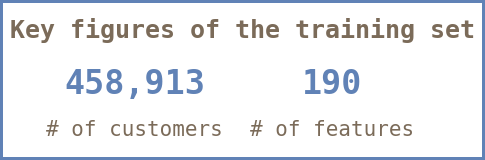

In [11]:
mpl.rcParams.update(mpl.rcParamsDefault)

fig1 = plt.figure(figsize=(2,2),facecolor='white')

ax1 = fig1.add_subplot(1,1,1)
font = 'monospace'
ax1.text(0.6, 0.8, "Key figures of the training set",color='#7b6b59',fontsize=18, fontweight='bold', fontfamily=font, ha='center')


ax1.text(0, 0.4, "{:,d}".format(train.shape[0]), color='#6082B6', fontsize=24, fontweight='bold', fontfamily=font, ha='center')
ax1.text(0, 0.100, "# of customers",color='#7b6b59',fontsize=15, fontweight='light', fontfamily=font,ha='center')


ax1.text(1.1, 0.4, "{}".format(train.shape[1]), color='#6082B6', fontsize=24, fontweight='bold', fontfamily=font, ha='center')
ax1.text(1.1, 0.100, "# of features",color='#7b6b59',fontsize=15, fontweight='light', fontfamily=font, ha='center')


ax1.set_yticklabels('')
ax1.tick_params(axis='y',length=0)
ax1.tick_params(axis='x',length=0)
ax1.set_xticklabels('')

for direction in ['top','right','left','bottom']:
    ax1.spines[direction].set_visible(False)

fig1.subplots_adjust(top=0.9, bottom=0.2, left=0, hspace=1)

fig1.patch.set_linewidth(3)
fig1.patch.set_edgecolor('#6082B6')
fig1.patch.set_facecolor('white')
ax1.set_facecolor('white')

plt.show()
plt.close()

In [12]:
delinquency_features = [c for c in train.columns if c.startswith('D_')]
spend_features = [c for c in train.columns if c.startswith('S_')]
payment_features = [c for c in train.columns if c.startswith('P_')]
balance_features = [c for c in train.columns if c.startswith('B_')]
risk_features = [c for c in train.columns if c.startswith('R_')]

print(f"Total number of Delinquency variables: {len(delinquency_features)}")
print(f"Total number of Spend variables: {len(spend_features)}")
print(f"Total number of Payment variables: {len(payment_features)}")
print(f"Total number of Balance variables: {len(balance_features)}")
print(f"Total number of Risk variables: {len(risk_features)}")

Total number of Delinquency variables: 96
Total number of Spend variables: 22
Total number of Payment variables: 3
Total number of Balance variables: 40
Total number of Risk variables: 28


In [13]:
labels=['Delinquency', 'Spend','Payment','Balance','Risk']
values= [len(delinquency_features), len(spend_features),len(payment_features), len(balance_features),len(risk_features)]


## First Plot
fig = go.Figure(data=[go.Pie(
    labels=labels, 
    values=values,
    hole=.4
)])

fig.update_traces(marker=dict(colors=['#a43725', '#e0d5bd', '#beb29e', '#E6b6a4', '#c07156']))

large_title_format = "<span style='font-size:30px; font-family:Times New Roman'>Feature Distribution</span>"
small_title_format = "<span style='font-size:14px; font-family:Helvetica'></b></span>"

layout = dict(
    title = large_title_format + "<br>" + small_title_format,
    font = dict(color = '#7b6b59'),
    showlegend = True,
    margin = dict(t=80,pad=0),

)
fig["layout"].update(layout)

fig.show()

In [14]:
titles=['Delinquency '+str(i).split('_')[1] if i.startswith('D') else 'Spend '+str(i).split('_')[1] 
        if i.startswith('S') else 'Payment '+str(i).split('_')[1]  if i.startswith('P') 
        else 'Balance '+str(i).split('_')[1] if i.startswith('B') else 
        'Risk '+str(i).split('_')[1] for i in train.columns[:-1]]
cat_cols=['Balance 30', 'Balance 38', 'Delinquency 63', 'Delinquency 64', 'Delinquency 66', 'Delinquency 68',
          'Delinquency 114', 'Delinquency 116', 'Delinquency 117', 'Delinquency 120', 'Delinquency 126', 'Target']

titles.append('Target')
train.columns=titles

## Target Variable Analysis.

- Plot the distribution of the target variable (pie chart or bar chart since it's binary).
- Calculate the base rate (i.e., what percentage of clients default).


In [15]:
# Count occurrences of each target value
target_counts = train["Target"].value_counts()
total_counts = len(train)

# Calculate percentages
percentages = (target_counts / total_counts * 100).round(2)

# Create the bar plot
fig = go.Figure()


# Add bar plot for target distribution
# Customizing the legend entries using the 'name' attribute
fig.add_trace(go.Bar(
    x=['0'],
    y=[target_counts[0]],
    text=f"{percentages[0]}%",
    textposition='auto',
    marker_color='#6082B6',
    name='Non-Default / Paid'  # Custom legend entry
))

fig.add_trace(go.Bar(
    x=['1'],
    y=[target_counts[1]],
    text=f"{percentages[1]}%",
    textposition='auto',
    marker_color='#933A16',
    name='Default'  # Custom legend entry
))


large_title_format = "<span style='font-size:30px; font-family:Times New Roman'>Target Distribution</span>"
small_title_format = "<span style='font-size:14px; font-family:Helvetica'></b></span>"

layout = dict(
    title = large_title_format + "<br>" + small_title_format,
    font = dict(color = '#7b6b59'),
    xaxis=dict(showticklabels=False),
    margin = dict(t=80,pad=0),
    plot_bgcolor='#fff',

)
fig["layout"].update(layout)


fig.show()


We start by reading the labels for the training data. There are neither missing values nor duplicated customer_IDs. Of the 458913 customer_IDs, 74 % have a label of 0 (good customer, no default) and 26 % have a label of 1 (bad customer, default).

We know that the good customers have been subsampled by a factor of 20; this means that in reality there are 6.8 million good customers. 98 % of the customers are good; 2 % are bad.

**Insight:**

- **The classes are imbalanced.** A StratifiedKFold for cross-validation is recommended. Because the classes are imbalanced, accuracy would be a bad metric to evaluate a classifier. The competition metric is a mix of area under the roc curve (auc) and recall.


## EDA for Categorical Features.

The distribution of a categorical variable refers to the frequency (or proportion) of each category or level within that variable. Unlike numerical variables, which are characterized by a range of values, categorical variables consist of distinct groups or categories. Understanding the distribution means understanding how often each category occurs in your dataset. The **Distribution of Categorical Variables** is summarized using:

- Visual display: pie chart or bar chart, supplemented by
- Numerical measures: frequency table of category counts and percentages.

Descriptive Statistics:

1. **Frequency Distribution:** Count the number of occurrences for each category. This simply counts the number of occurrences for each category within the variable.

1. **Relative Frequency (or Proportion) Distribution - Percentage Count:** Get the percentage distribution for each category. This represents the proportion or percentage of each category relative to the whole dataset.

Visualization:

1. **Bar Chart:** For each categorical variable, use a bar chart to visualize the frequency distribution. Bar charts can be used in many ways, **one of the common use is to visualize the data distribution of categorical variables in data.** X-axis being the unique category values and Y-axis being the frequency of each value.

1. **Stacked Bar Chart / Mosaic Plot:** Show the distribution of the target variable (default or not) with respect to each category. This will help you understand if certain categories have higher or lower default rates. A stacked bar chart divides a bar for each category of one variable into segments that represent the distribution of a second categorical variable. Example: Let's consider the categorical variable "Employment Type" with categories like "Full-time", "Part-time", "Self-employed", etc. If you want to see how defaults (your target variable with categories "Default" and "No Default") are distributed across each employment type, you'd:

    - Plot a bar for each employment type.
    - Divide or "stack" each bar based on the number of defaults and non-defaults.

1. **Grouped bar charts** are another effective way to compare the distribution of a categorical variable across different levels of another categorical variable (like your target variable).

    1. **Comparing Absolute Frequencies:** Each colored bar within a group will show the absolute number of occurrences for each category of the target variable (e.g., "Default" vs. "No Default") for a particular category of your feature variable. By comparing the heights of the colored bars side by side, you can see which groups have more defaults in absolute terms.
 
    1. **Comparing Across Categories:** You can also compare across the main categories of the feature variable. For instance, if you're looking at "Employment Type," you can compare the "Default" bars for "Full-time", "Part-time", and "Self-employed" directly since they're placed side by side.

    1. **Visualizing Disparities:** If there's a stark difference in the heights of bars for a particular category (like a much taller "Default" bar for "Self-employed" compared to "No Default"), it indicates a higher number of defaults for that group.

    1. **Potential Caveats:** As with the stacked bar charts, be cautious about interpreting raw counts. A category might have higher defaults just because it has more data points overall. Always consider looking at proportions or default rates for a more accurate picture. To address this concern when using grouped bar charts:

        1. **Supplementary Analysis:** It's often helpful to complement these charts with another analysis or visualization that does focus on proportions or rates. For instance, a table next to the chart that lists default rates by category can be very insightful.

        1. **Alternative Visualization:** Consider creating a separate chart that visualizes the proportion of defaults in each category. This could be a simple bar chart where the height of the bar represents the default rate for each category.

        1. **Annotation:** If you have a key insight from another analysis (like the actual default rate for a category), you can annotate the grouped bar chart with this information. For example, above the "Self-employed" bars, you might note "Default rate: 20%".

        1. **Educate the Audience:** If presenting to stakeholders, it's essential to emphasize that they're looking at absolute numbers and highlight the importance of also considering proportions.

        1. **Diversify Visualizations:** Sometimes, using multiple visualization types for the same data can provide a more comprehensive understanding. While the grouped bar chart showcases absolute numbers, another chart (like a pie chart or a simple proportion bar chart) can present the proportional breakdown for clearer risk assessment.

    1. **Ease of Interpretation:** Grouped bar charts are especially useful when you have a few distinct categories to compare. If there are too many categories or if the differences are subtle, the chart may become cluttered and harder to interpret than stacked bar charts.
 
    1. **Trends and Patterns:** You might observe certain trends, like certain categories consistently having higher defaults across various features. For instance, if you observe that younger age groups show a higher default rate across various employment types, you might conclude that age plays a more dominant role in determining defaults than employment type.

To sum up, grouped bar charts, while presenting data in absolute terms, can still provide valuable insights into the distribution of your target variable across different categories. As always, the key lies in thoughtful interpretation and considering the broader context. In essence, while grouped bar charts are useful for visualizing and comparing raw counts across categories, it's crucial to be aware of their limitations and to complement them with additional analyses or visualizations that capture proportions or rates to convey a more accurate picture of risk.


**Conclusions and Insights You Can Draw:**

1. **Identifying High-Risk Categories:** If a certain category has a much higher proportion of defaults than others, that category might be considered higher risk. For instance, if "Self-employed" individuals have a high default rate, lending policies might be reviewed for this group.
    - You can easily see if, for instance, "Self-employed" individuals have a higher proportion of defaults compared to "Full-time" employees.
    - The absolute height of the bar can show you how many people belong to each employment category, while the segments give you a proportionate view of defaults within each category.

1. **Feature Importance for Modeling:** Categories with clear differences in default rates can be indicative of important features that a machine learning model should not overlook.

1. **Potential Bias Identification:** If a certain category is disproportionately leading to defaults, it might be worth investigating if there's any data bias or external factors causing this pattern.

1. **Policy Implications:** For financial institutions, understanding which groups are more likely to default can lead to tailored financial literacy programs, different engagement strategies, or alternative payment plans for those groups.


The raw count (or frequency) of occurrences in a category can sometimes be misleading. If a particular category has a high number of defaults, but also a high number of non-defaults, then it may not necessarily indicate higher risk; it might just indicate that the category itself is more common in the dataset.

To address this:



1. **Focus on Proportions or Rates:** Rather than just looking at raw counts, consider the default rate (i.e., the proportion of defaults within the category). For instance, if "Self-employed" individuals comprise 200 defaults out of a total of 1,000 self-employed individuals, the default rate is 20%. If "Full-time" employees have 500 defaults out of a total of 5,000 full-time employees, their default rate is 10%. Even though the absolute number of defaults is higher for full-time employees, the risk, as represented by the default rate, is higher for the self-employed group.

1. **Visual Tools:** This is where tools like stacked bar charts are handy. While the height of the bar might represent the total count, the segmented (or stacked) portions represent the proportion of each category (default vs. non-default). It's easy to see and compare proportions across categories.

1. **Dive Deeper with Segmentation:** If a category has a high frequency overall, consider breaking it down further if possible. For example, "Self-employed" can be further segmented into "Freelancers," "Business Owners," "Contractors," etc. This might reveal more specific patterns or risk profiles.

1. **Contextualize with Other Features:** It's also important to see how this category interacts with other features. Perhaps "Self-employed" individuals with a certain credit score range, or from a particular region, are more prone to defaulting than others.

In conclusion, while raw counts provide a starting point, it's vital to dive deeper and consider proportions, utilize appropriate visualizations, and perform further analyses to draw meaningful conclusions about risk.

**Broadly speaking, if the distributions for target=0 and target=1 differ significantly for a given feature, it suggests that the feature carries information about the target variable, and it might be useful for predictive modeling.** When the distributions for the two target values are distinct or significantly different for a specific feature, it indicates that there's a relationship or association between that feature and the outcome. In other words, knowing the value of the feature might give some insight or increase the likelihood of predicting the target correctly.

In [16]:
# This code visualizes the distribution of cat_cols (which presumably represents categorical columns) with respect to the target variable (Target).
# Each category value is shown in subplots, and for each category value, two bars are displayed: 
# one for target 1 (Default) and another for target 0 (Paid). The colors and styles are also customized.
pal, color=['#6082B6', '#933A16'], ['#6082B6', '#933A16']
rgb=['rgba'+str(matplotlib.colors.to_rgba(i,0.7)) for i in pal]

# Creates a subplot grid with 4 rows and 3 columns. 
# The titles of the subplots are taken from the variable cat_cols, excluding its last element. 
fig = make_subplots(
    rows=4, 
    cols=3, 
    subplot_titles=cat_cols[:-1], 
    vertical_spacing=0.1
)

row=0
c=[1,2,3]*5
plot_df=train[cat_cols]
# Loop to Add Bars to Subplots
# This loop runs through each column in cat_cols (excluding the last one) 
for i,col in enumerate(cat_cols[:-1]):
    
    if i%3==0:
        row+=1
    
    plot_df[col]=plot_df[col].astype(object).fillna("N/A")
    
    df=plot_df.groupby(col)['Target'].value_counts(dropna=False).rename('count').reset_index()
    
    all_categories = df[col].unique()
    
    # Getting values for Target=1
    df_target_1 = df[df.Target == 1].set_index(col)['count'].reindex(all_categories).fillna(0).reset_index()
    df_target_1[col]=df_target_1[col].values.astype(str)

    
    # Getting values for Target=0
    df_target_0 = df[df.Target == 0].set_index(col)['count'].reindex(all_categories).fillna(0).reset_index()
    df_target_0[col]=df_target_0[col].values.astype(str)

    
    # Adds a bar for the target 1 (Default) and another for target 0 (Paid) to the subplots.
    fig.add_trace(
        go.Bar(
            x=df_target_1[col],
            y=df_target_1['count'],
            marker_color=rgb[1], 
            marker_line=dict(color=pal[1],width=2), 
            hovertemplate='Value %{x} Frequency = %{y}',
            name='Default', 
            showlegend=(True if i==0 else False)
        ),
        row=row, 
        col=c[i]
    )
    
    fig.add_trace(
        go.Bar(
            x=df_target_0[col], 
            y=df_target_0['count'],
            marker_color=rgb[0],
            marker_line=dict(color=pal[0],width=2),
            hovertemplate='Value %{x} Frequency = %{y}',
            name='Paid', showlegend=(True if i==0 else False)
        ),
        row=row, 
        col=c[i]
    )
    if i%3==0:
        fig.update_yaxes(title='Frequency',row=row,col=c[i])

large_title_format = "<span style='font-size:24; font-family:Times New Roman'>Distribution of Categorical Variables</span>"
small_title_format = "<span style='font-size:14px; font-family:Helvetica'></b></span>"

title_format = {
    'text': large_title_format + "<br>" + small_title_format,
    'xanchor': 'center',  # anchor point
    'x': 0.5  # x-coordinate in fractional coordinates, 0.5 represents the center
}

fig.update_layout(
    legend=dict(orientation="h",yanchor="bottom",y=1.03,xanchor="right",x=0.2),
    barmode='group',
    height=1500,
    width=900,
    title=title_format,
    font = dict(color = '#7b6b59'),
    plot_bgcolor='#fff'
)

fig.show()


According to the data description, there are eleven categorical features. We plot histograms for target=0 and target=1. For the features which have missing values, the missing values are represented by the rightmost bar of the histogram.

**Insight:**

- Every feature has at most eight categories (including a nan category). One-hot encodings are feasible.
- The distributions for target=0 and target=1 differ. This means that every feature might give some information about the target.

In [17]:
pal, color=['#6082B6', '#933A16'], ['#6082B6', '#933A16']
rgb=['rgba'+str(matplotlib.colors.to_rgba(i,0.7)) for i in pal]

fig = make_subplots(rows=4, cols=3, subplot_titles=cat_cols[:-1], vertical_spacing=0.1)

row = 0
c = [1,2,3] * 5
plot_df = train[cat_cols]

for i, col in enumerate(cat_cols[:-1]):
    
    if i % 3 == 0:
        row += 1
    
    plot_df[col] = plot_df[col].astype(object).fillna("N/A")
    
    # Grouping by category and target to get counts
    df = plot_df.groupby(col)['Target'].value_counts(dropna=False).rename('count').reset_index()
    
    # Getting total counts per category
    df_total = plot_df[col].value_counts().rename('total').reset_index()
    df_total.columns = [col, 'total']
    
    # Merging to get total counts alongside individual target counts
    df = df.merge(df_total, on=col)
    
    # Calculating percentage
    df['percentage'] = (df['count'] / df['total']) * 100
    
    all_categories = df[col].unique()
    for target in [1, 0]:
        
        df_target = df[df.Target == target].set_index(col)['count'].reindex(all_categories).fillna(0).reset_index()
        df_percentage = df[df.Target == target].set_index(col)['percentage'].reindex(all_categories).fillna(0).reset_index()
        df_target[col]=df_target[col].values.astype(str)
        
        hover_text = [f'Value: {cat}<br>Percentage: {perc:.2f}%' for cat, perc in zip(df_target[col], df_percentage['percentage'])]
    
        fig.add_trace(
            go.Bar(
                x=df_target[col],
                y=df_target['count'],  # Using actual counts for y-values
                hovertext=hover_text,  # Add custom hover text here
                marker_color=rgb[target], 
                marker_line=dict(color=pal[target], width=2), 
                hoverinfo='text',  # Use the custom hover text
                name='Default' if target == 1 else 'Paid', 
                showlegend=(True if i == 0 else False)
            ),
            row=row, 
            col=c[i]
        )

    if i % 3 == 0:
        fig.update_yaxes(title='Frequency', row=row, col=c[i])

        
large_title_format = "<span style='font-size:24; font-family:Times New Roman'>Distribution of Categorical Variables</span>"
small_title_format = "<span style='font-size:14px; font-family:Helvetica'></b></span>"

title_format = {
    'text': large_title_format + "<br>" + small_title_format,
    'xanchor': 'center',
    'x': 0.5
}

fig.update_layout(
    legend=dict(orientation="h", yanchor="bottom", y=1.03, xanchor="right", x=0.2),
    barmode='stack',
    height=1500,
    width=900,
    title=title_format,
    font=dict(color='#7b6b59'),
    plot_bgcolor='#fff'
)

fig.show()


## Density Plots, EDA for Numerical Features.

1. **Density Plots:** Gives a smoothed version of the histogram, useful for understanding the shape of the distribution.
1. **Correlation Heatmap:** To understand the relationship between multiple numerical features.
1. **Histograms:** To see the distribution of data.
1. **Box Plots:** Helps in identifying outliers and understanding the distribution.

#### What is a histogram? 

A histogram is a chart that plots the distribution of a numeric variable’s values as a series of bars. Each bar typically covers a range of numeric values called a bin or class; a bar’s height indicates the frequency of data points with a value within the corresponding bin. Histograms are good for showing general distributional features of dataset variables. You can see roughly where the peaks of the distribution are, whether the distribution is skewed or symmetric, and if there are any outliers. In order to use a histogram, we simply require a variable that takes continuous numeric values. This means that the differences between values are consistent regardless of their absolute values. For example, even if the score on a test might take only integer values between 0 and 100, a same-sized gap has the same meaning regardless of where we are on the scale: the difference between 60 and 65 is the same 5-point size as the difference between 90 to 95. To construct a histogram:

1. The data range is divided into a set of bins.
1. The data points are sorted into each bin based on their value.
1. The number of data points that fall into each bin are then represented as vertical bars, with the height of each bar corresponding to the number of data points (frequency) in that bin.
    
Key characteristics of a histogram:

1. **Bins:** These are intervals into which the data range is divided. The width and number of bins can significantly affect the resulting shape and interpretation of the histogram.

1. **Frequency:** This is the number of data points in each bin. The height of each bar represents this frequency.

1. **Shape:** The overall appearance of the histogram can give insights into the underlying distribution of the data. For instance, a histogram might appear bell-shaped, indicating a normal distribution, or it might be skewed to the left or right.

1. **No Gaps:** Unlike bar charts, which represent categorical data and can have gaps between bars, histograms typically have no gaps between bars since they represent continuous, numerical data.

#### Differences between a bar chart and a histogram:

1. **Type of Data:** Histograms are used for continuous numerical data, while bar charts are used for categorical data or discrete numerical data.

1. **Gaps:** Bar charts can have gaps between bars, while histograms typically don't.

1. **Order:** In bar charts, bars can be arranged in any order, whereas histograms are ordered based on the value of the data

#### Density function

A **density function** describes the likelihood or probability of a particular value or range of values of a random variable. It provides a way to model continuous random variables and their distributions. There are two primary types of density functions:

- **Probability Density Function (PDF)**: For continuous random variables.
- **Probability Mass Function (PMF)**: For discrete random variables.

- Here, let's focus on the **Probability Density Function (PDF)** since you inquired about "density function": For a continuous random variable  X, the PDF, often denoted as  f(x), is a function that describes the likelihood of X taking on a particular value. However, because X is continuous, the probability of  X being exactly any specific value is technically zero. Instead, we often look at the probability that X falls within a specific interval.

- A density function provides a mathematical model for how the probabilities are distributed across different values of a random variable. By understanding the shape and properties of a density function, we can make predictions, inferences, and conclusions about the underlying process or system that produces the data.

#### Probability Density Function (PDF)


**What Is a Probability Density Function (PDF)?**  The probability density function (PDF) is a statistical expression that defines the probability that some outcome will occur. In this function, the probability is the percentage of a dataset's distribution that falls between two criteria. The probability density function measures continuous variables—stock and investment returns are generally not continuous random variables; they are discrete. However, most financial analysts assume that returns and prices are continuous so that they can model performance and analyze risks. What Does a Probability Density Function (PDF) Tell Us? A probability density function (PDF) describes how likely it is to observe some outcome resulting from a data-generating process. A PDF can tell us which values are most likely to appear vs. the less likely outcomes. This will change depending on the shape and characteristics of the PDF. To plot the Probability Density Function (PDF) of a dataset, you generally have two scenarios:

- **Known Distribution:** If you know or assume that your data follows a particular theoretical distribution (like normal, exponential, etc.), you can use the mathematical formula for that distribution's PDF. For example, the PDF of a normal distribution is a bell-shaped curve defined by a specific formula involving its mean and standard deviation.

- **Unknown Distribution:** If you don't have a specific distributional assumption for your data, you can estimate its PDF using techniques like Kernel Density Estimation (KDE). If you don't want to assume a specific distribution, you can estimate the PDF using Kernel Density Estimation (KDE).In the KDE approach, the resulting curve gives an estimate of the data's PDF without assuming it follows any specific known distribution. Finally, remember that while the shape of the estimated PDF (from KDE) provides insights into the data's distribution, it is influenced by factors like kernel choice and bandwidth. Adjusting these parameters can change the appearance of the estimated PDF.

#### Kernel density estimate (KDE) plot

A **kernel density estimate (KDE) plot** is a method for visualizing the distribution of observations in a dataset, analogous to a histogram. KDE represents the data using a continuous probability density curve in one or more dimensions. A density estimate or density estimator is just a fancy word for a guess: We are trying to guess the **density function f that describes well the randomness of the data.** A kernel is a smoothing function used to estimate the probability density function of a random variable. Essentially, KDE is a way to produce a smoothed version of a histogram.

Here's how KDE works:

1. **Place a Kernel on Each Point:** For each data point in the dataset, place a kernel (usually a bell-shaped curve like a Gaussian).

1. **Sum All Kernels:** Sum up the value of the kernel function for every point to produce a continuous, smooth curve. This means that at any given x-value, you're adding up the contributions from each kernel at that x-value.

1. **Normalize**: The area under the resulting curve is normalized to 1, making it a valid probability density function.

The key aspects to understand about the kernel in KDE are:

1. **Type of Kernel:** There are various types of kernel functions that can be used in KDE, including Gaussian, Epanechnikov, Exponential, and others. The Gaussian kernel is the most common and looks like a normal distribution curve.

1. **Bandwidth (h):** The bandwidth is a crucial parameter in KDE. It determines the width of the kernel placed at each data point. A small bandwidth will produce a curve that is wiggly and adheres closely to the data points, capturing more details but also potentially noise. A large bandwidth will produce a smoother curve but might oversmooth and miss some nuances in the data distribution. Choosing an appropriate bandwidth is vital for producing a meaningful KDE.

A KDE plot provides a smooth and continuous representation of data distribution, whereas a histogram provides a binned representation. The advantage of KDE is that it can provide a clearer picture of the data distribution without being sensitive to the choice of bins (as in a histogram). However, the choice of kernel and bandwidth in KDE can significantly affect the resulting plot. Choosing an appropriate kernel function for Kernel Density Estimation (KDE) largely depends on the nature of the data, the specific application, and sometimes even personal or domain-specific preferences. However, there are some general guidelines and considerations that might help:

1. **Data Characteristics:** Consider the characteristics of your data. If you have prior knowledge about the underlying distribution or specific properties of the data, that might guide your choice. For example, if you know the data is strictly positive, you might not want a kernel that produces estimates below zero (like the Gaussian kernel might).

1. **Commonly Used Kernels:** For many general applications, the Gaussian (normal) kernel is the default choice because of its mathematical properties and the central limit theorem, which suggests that many natural processes have outputs that are roughly normally distributed.


***A histogram aims to approximate the underlying probability density function that generated the data by binning and counting observations. Kernel density estimation (KDE) presents a different solution to the same problem. Rather than using discrete bins, a KDE plot smooths the observations with a Gaussian kernel, producing a continuous density estimate.*** A histogram puts all samples between the boundaries of each bin will fall into the bin. It doesn't differentiate whether the value falls close the left, to the right or the center of the bin. A kde plot, on the other hand, takes each individual sample value and draws a small gaussian bell curve over it. Then, all bell curves are summed together to form the final curve. A bell curve has some width, making the kde curve a bit wider than the histogram. In general, a kdeplot supposes the underlying distribution is quite smooth and goes slowly to zero near the edges.

- The seaborn library uses gaussian kernel to plot the Kernel Density Estimation `kdeplot(data)`



### EDA of Delinquency variables.

In [18]:
def get_the_kde_plot(
    fig_nbr_rows: int, 
    fig_nbr_columns: int, 
    fig_size: Tuple[int, int], 
    scope_cols: List[str], 
    plot_df: pd.DataFrame, 
    title: str, font_size: int
) -> None:
    """
    Create a KDE plot for the given columns in the dataframe.

    Parameters:
        fig_nbr_rows (int): Number of rows in the figure grid.
        fig_nbr_columns (int): Number of columns in the figure grid.
        fig_size (Tuple[int, int]): Size of the entire figure.
        scope_cols (List[str]): Columns to be plotted.
        plot_df (pd.DataFrame): DataFrame containing the data to be plotted.
        title (str): Title of the plot.
        font_size (int): Font size of the title.
        
    Returns:
        None. Displays the plot.
    """    
    fig, axes = plt.subplots(fig_nbr_rows, fig_nbr_columns, figsize = fig_size)

    row = 0
    col = [i for i in range(0, fig_nbr_columns)] * fig_nbr_rows

    for i, column in enumerate(scope_cols[:-1]):
        if (i != 0) & (i%fig_nbr_columns == 0):
            row+=1
    
        sns.kdeplot(
            x=column, 
            hue="Target",
            hue_order=[1,0], 
            palette=["#933A16", "#6082B6"], 
            label=["Default", "Paid"], 
            data=plot_df[scope_cols],
            fill=True, 
            linewidth=2, 
            legend=False, 
            ax= axes[row,col[i]] if fig_nbr_rows > 1 else axes[i],
            warn_singular=False
        )
        if fig_nbr_rows > 1:
            axes[row,col[i]].tick_params(left=False,bottom=False)
            axes[row,col[i]].set(title='\n\n{}'.format(column), xlabel='', ylabel=("Density" if i%fig_nbr_columns == 0 else ''))
        else:
            axes[i].tick_params(left=False,bottom=False)
            axes[i].set(title='\n\n{}'.format(column), xlabel='', ylabel=("Density" if i%fig_nbr_columns == 0 else ''))
    
    empty_plots = (fig_nbr_rows * fig_nbr_columns) - (len(list(plot_df[scope_cols].columns)) - 1)

    for i in range(fig_nbr_columns - empty_plots, fig_nbr_columns):
        axes[fig_nbr_rows - 1,i].set_visible(False)
    
    if fig_nbr_rows > 1:
        handles, _ = axes[0,0].get_legend_handles_labels() 
    else:
        handles, _ = axes[0].get_legend_handles_labels() 
        
    fig.legend(labels=['Default','Paid'], handles=reversed(handles), ncol=2, bbox_to_anchor=(0.18, 1))
    sns.despine(bottom=True, trim=True)
    plt.tight_layout(rect=[0, 0.2, 1, 0.99])

    fig.suptitle(title, fontsize = font_size, x = 0.5, y = 1, color="#7b6b59")
    plt.show()
    plt.close()
    

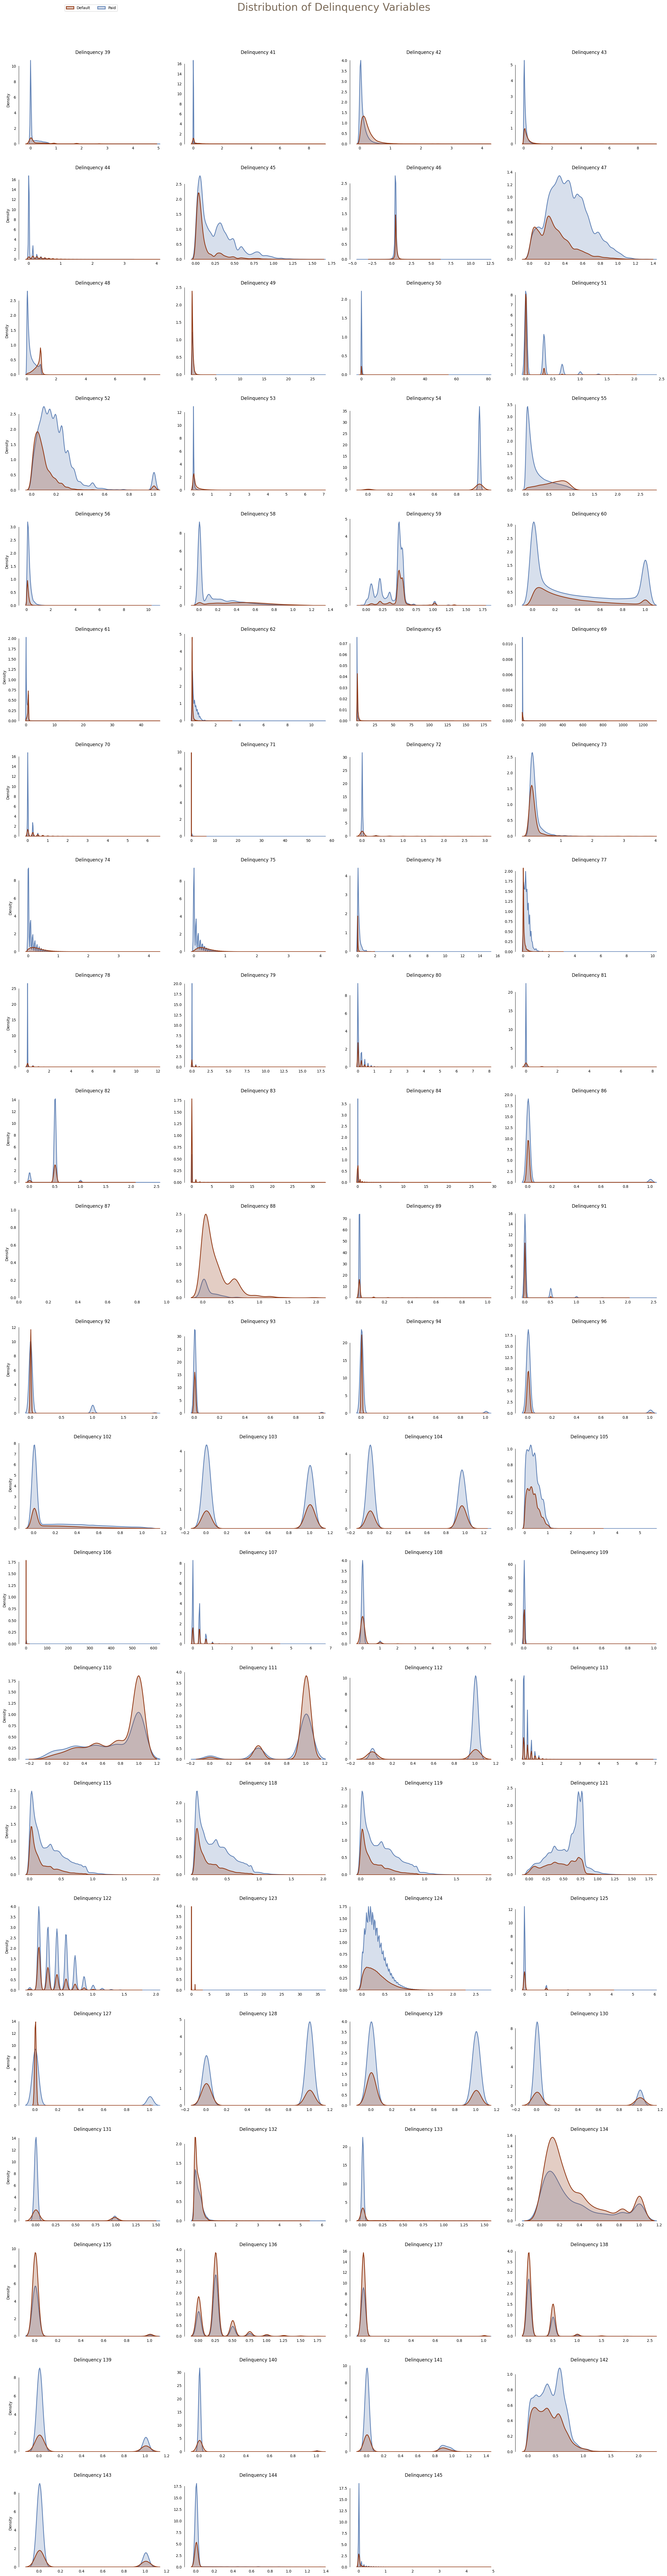

In [19]:
cols=[col for col in train.columns if (col.startswith(('D','T'))) & (col not in cat_cols[:-1] + ["Spend 2"])]
plot_df=train[cols]
get_the_kde_plot(22, 4, (25, 120), cols, plot_df, "Distribution of Delinquency Variables", 28)

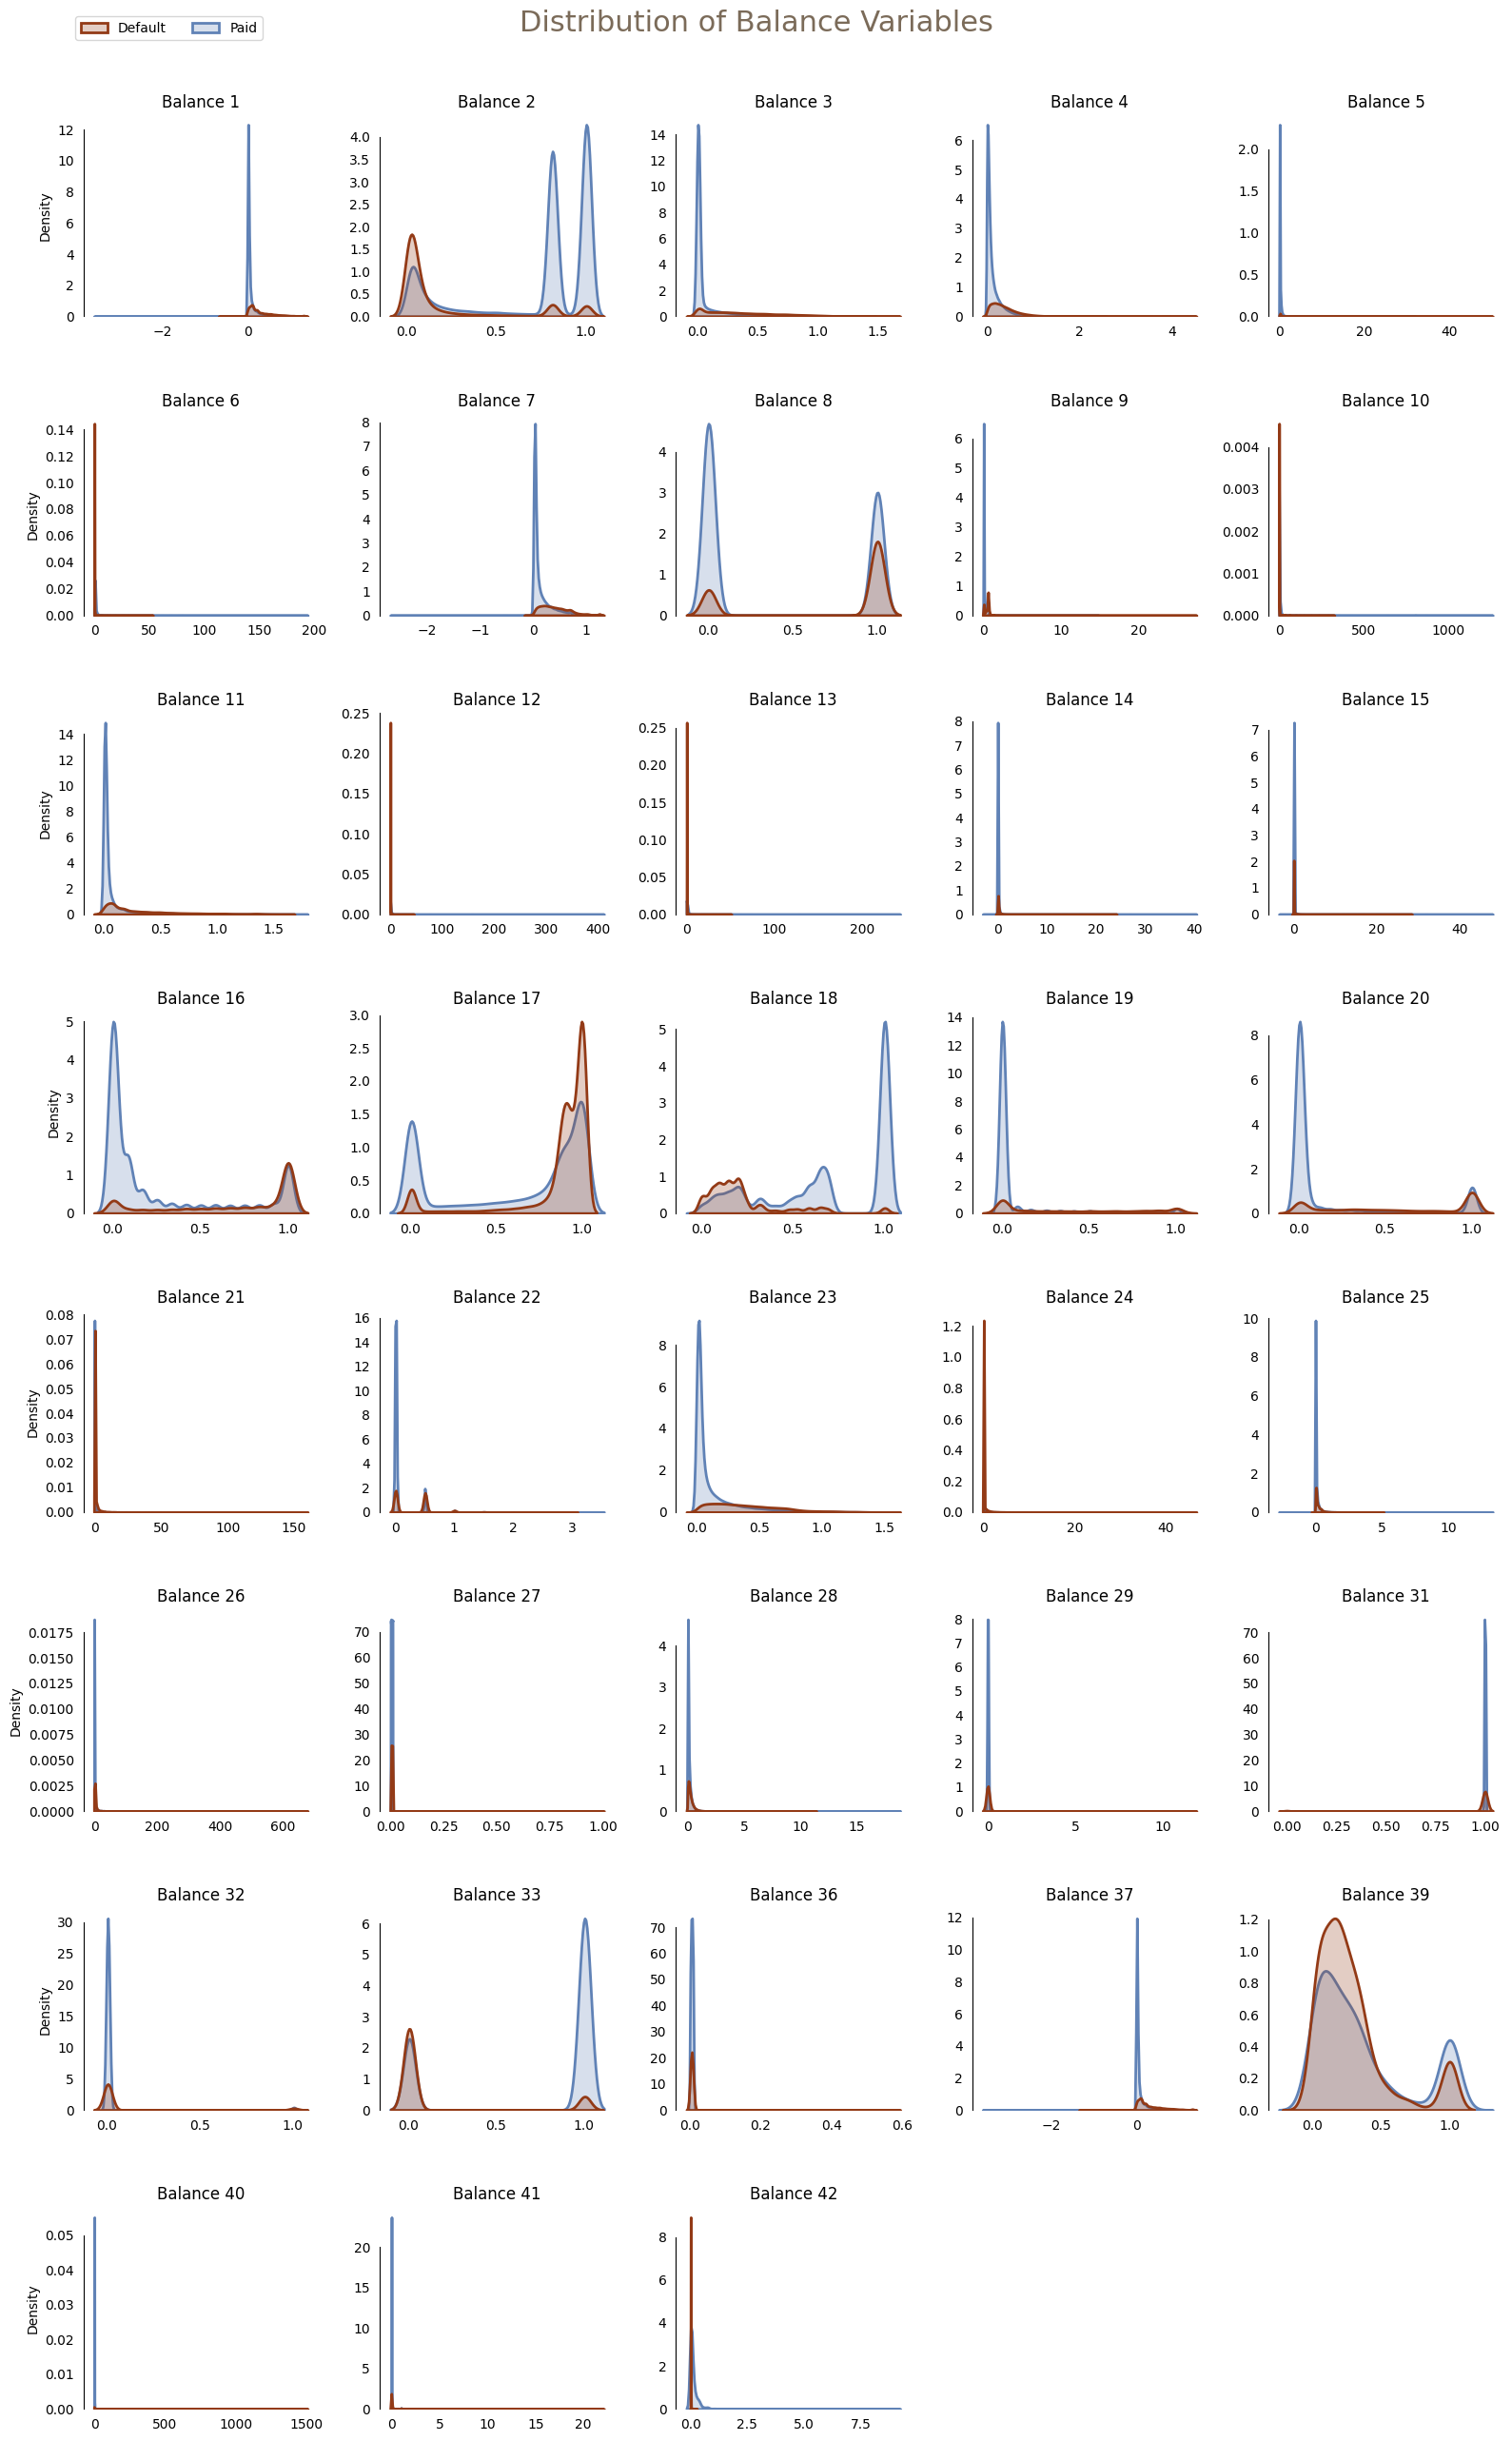

In [20]:
cols=[col for col in train.columns if (col.startswith(('B','T'))) & (col not in cat_cols[:-1])]
plot_df=train[cols]
get_the_kde_plot(8, 5, (16, 32), cols, plot_df, "Distribution of Balance Variables", 22)

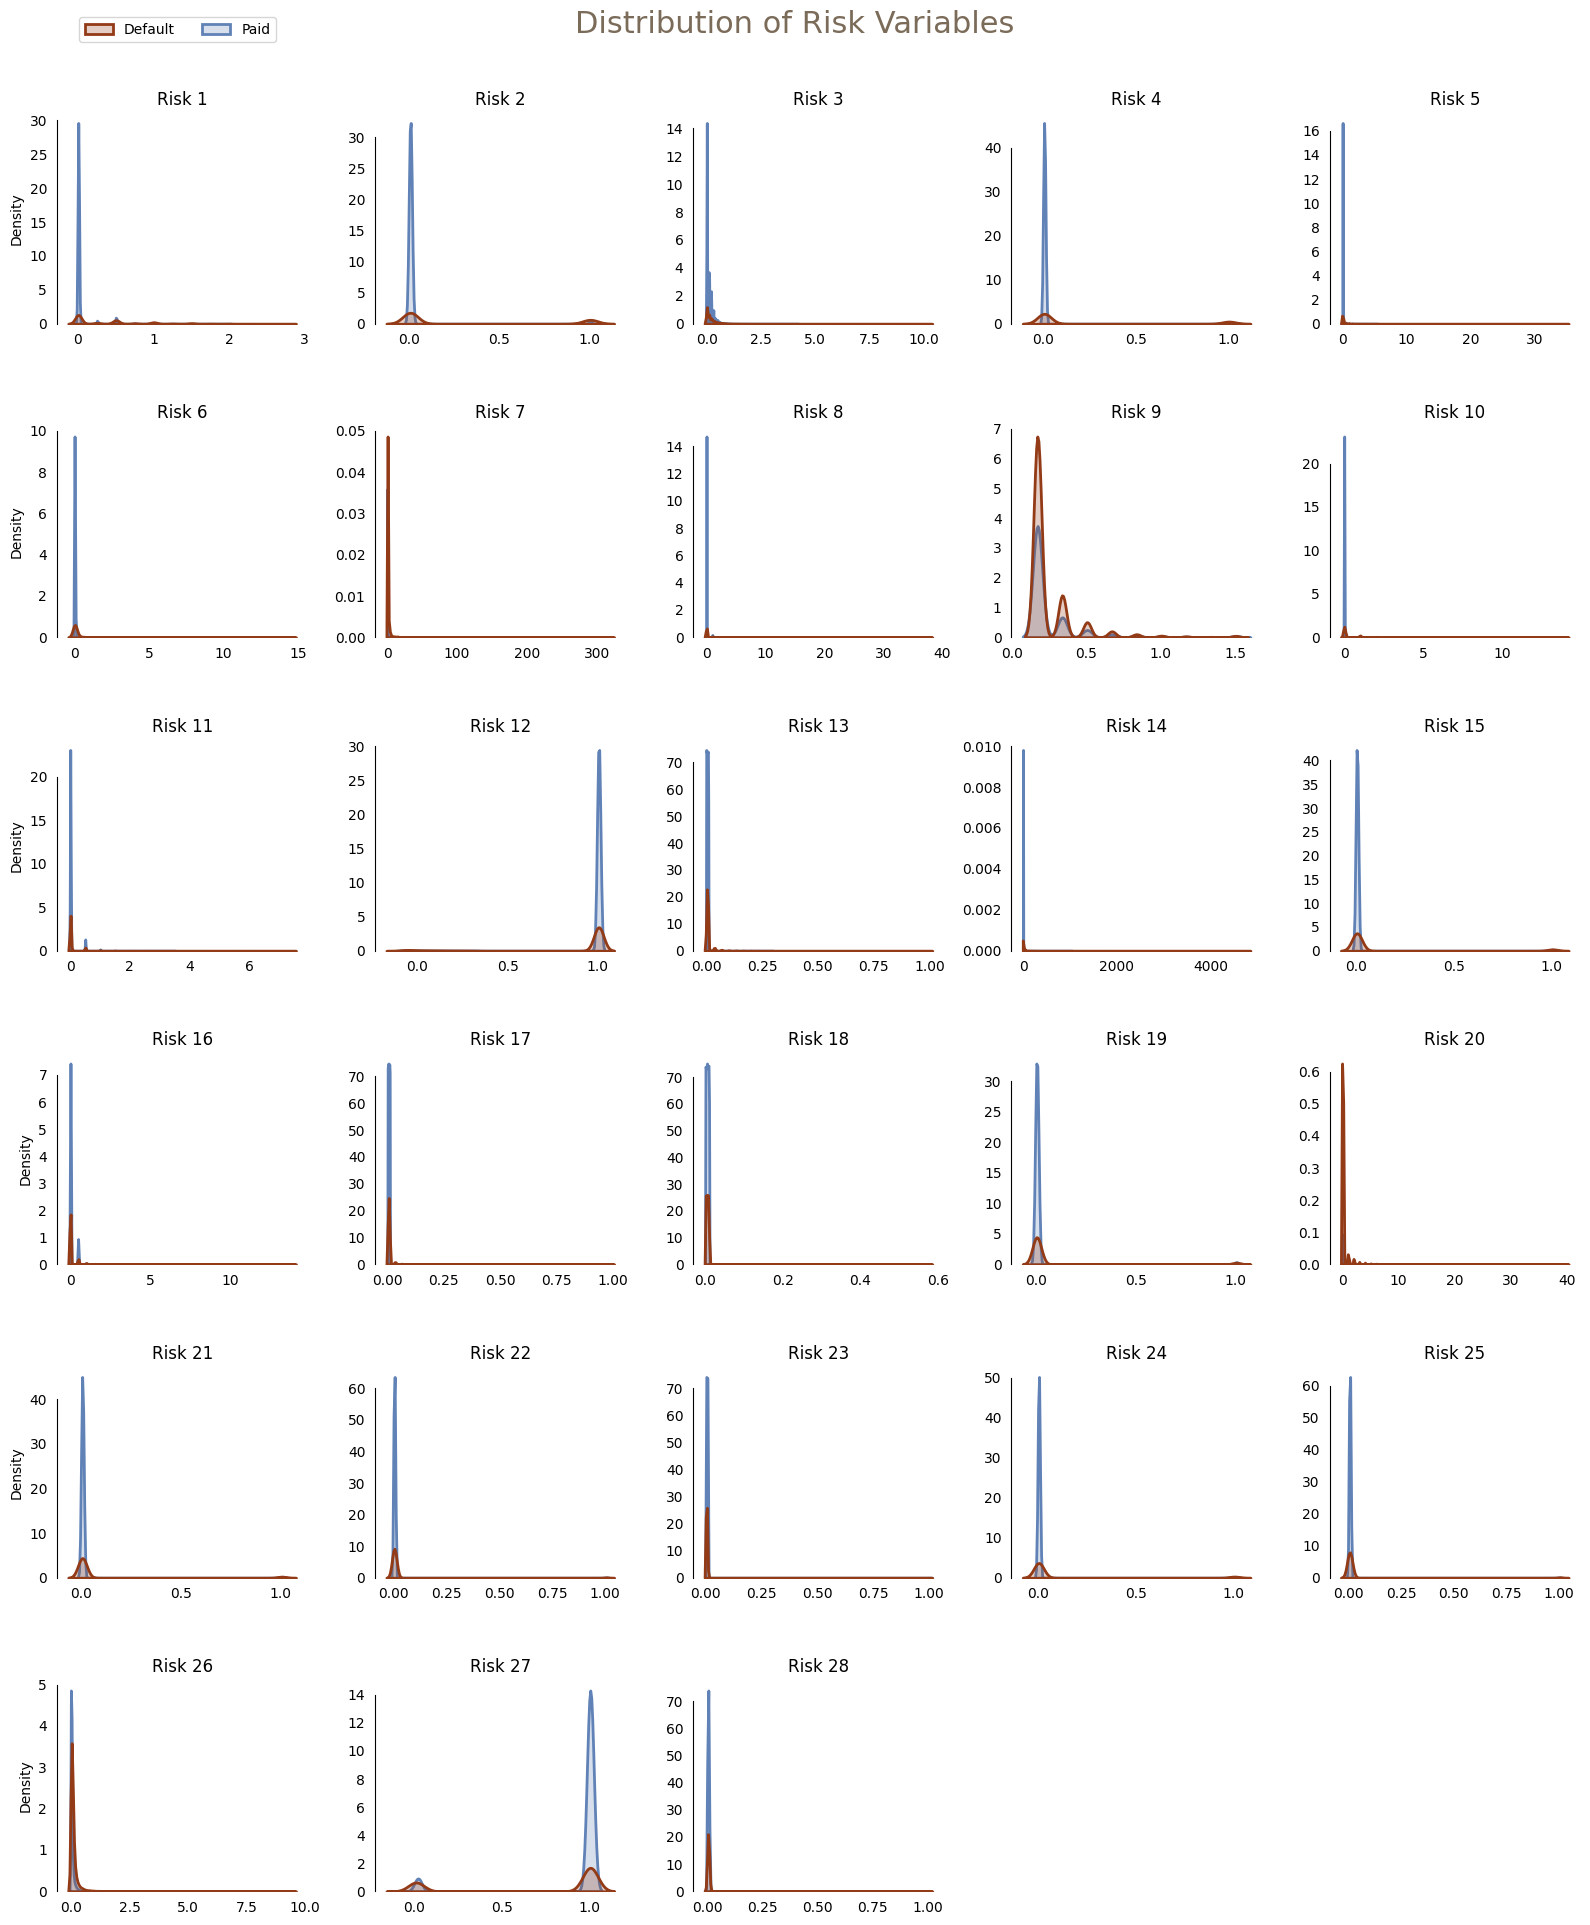

In [21]:
cols=[col for col in train.columns if (col.startswith(('R','T'))) & (col not in cat_cols[:-1])]
plot_df=train[cols]
get_the_kde_plot(6, 5, (16, 24), cols, plot_df, "Distribution of Risk Variables", 22)

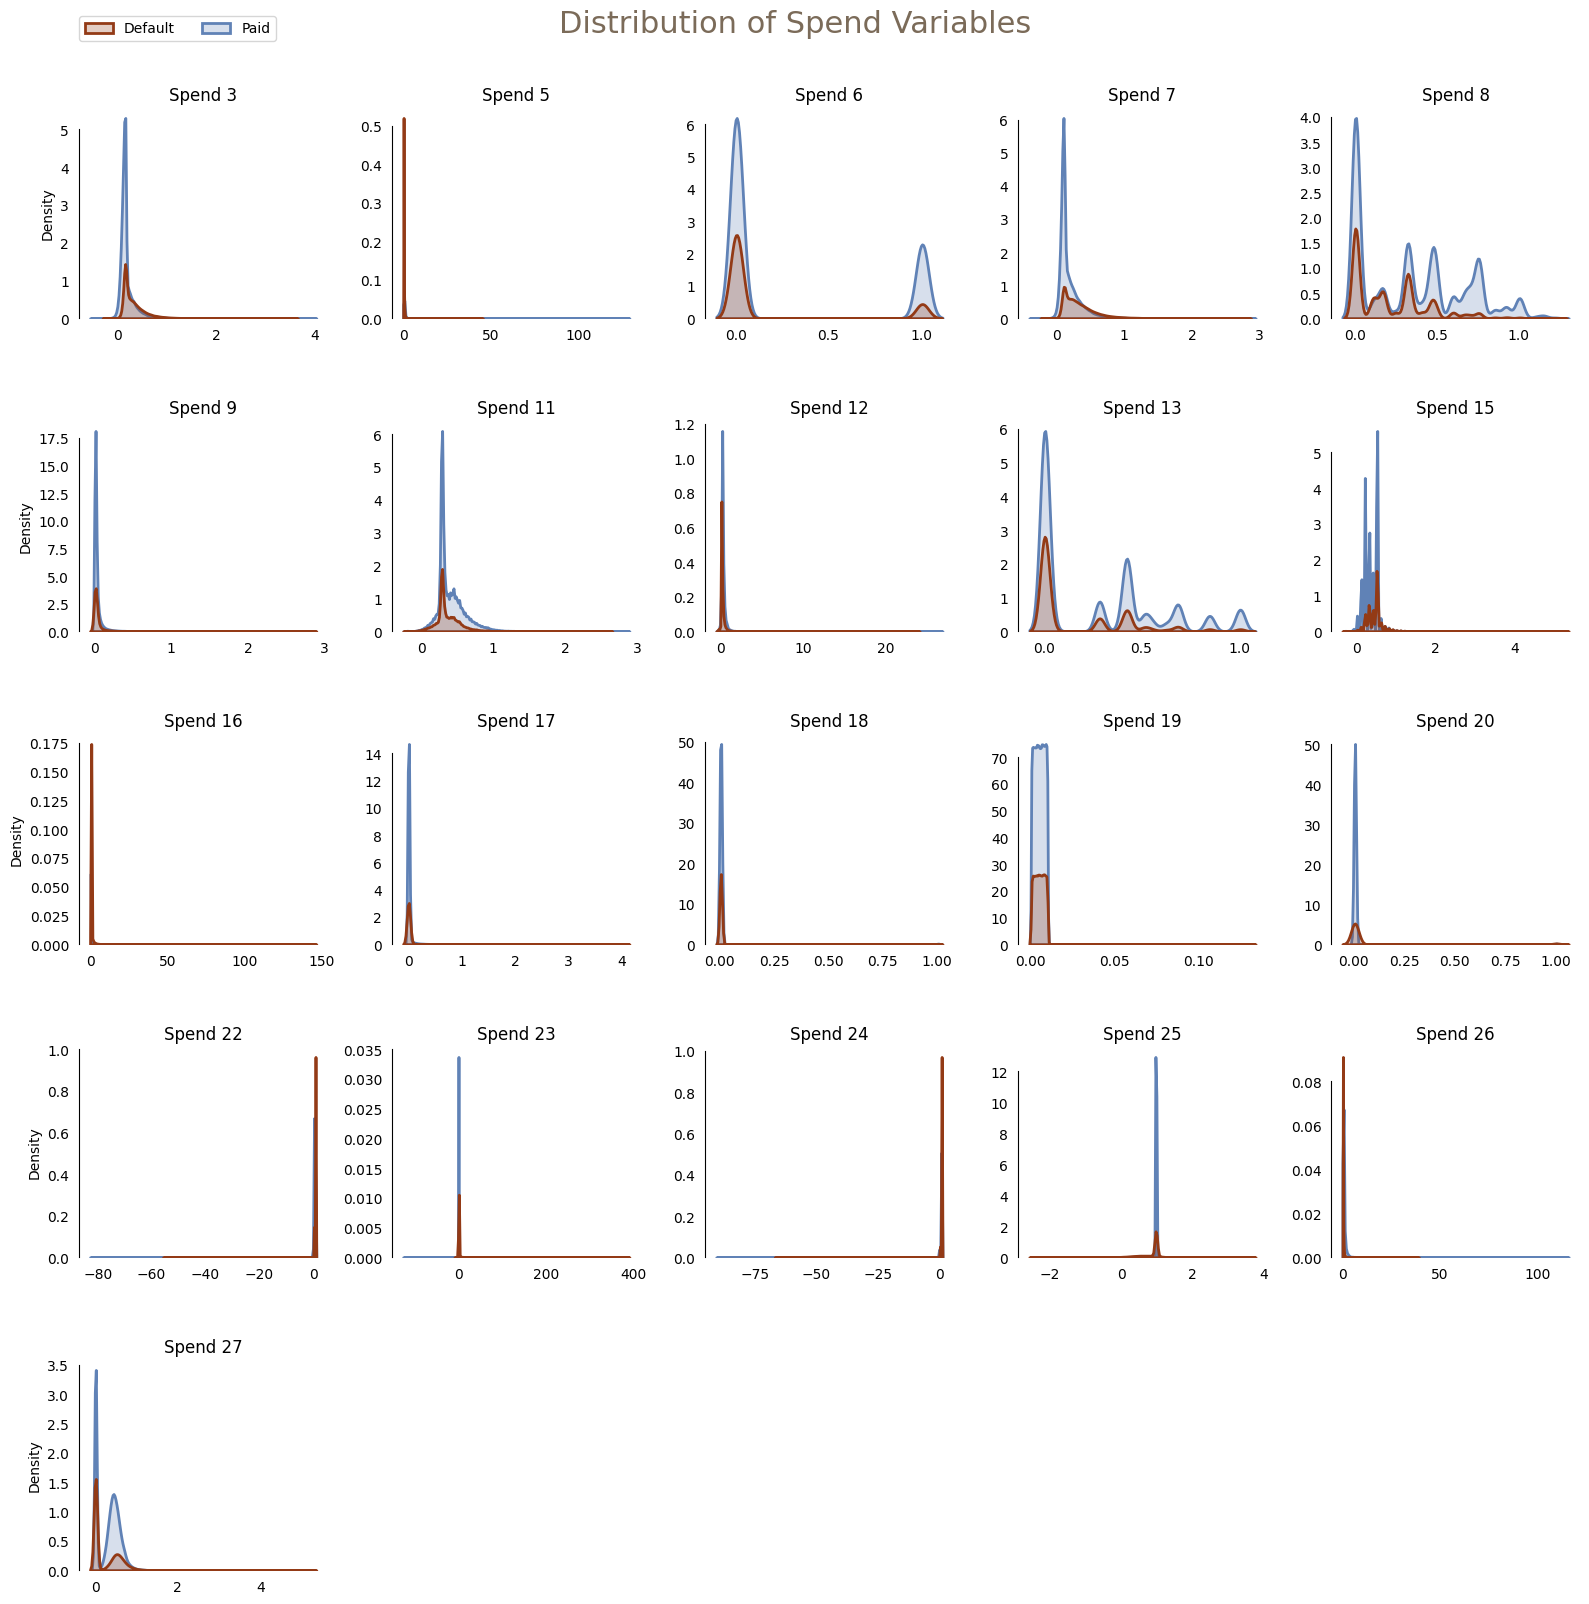

In [22]:
cols=[col for col in train.columns if (col.startswith(('S','T'))) & (col not in cat_cols[:-1] + ["Spend 2"])]
plot_df=train[cols]
get_the_kde_plot(5, 5, (16, 20), cols, plot_df, "Distribution of Spend Variables", 22)

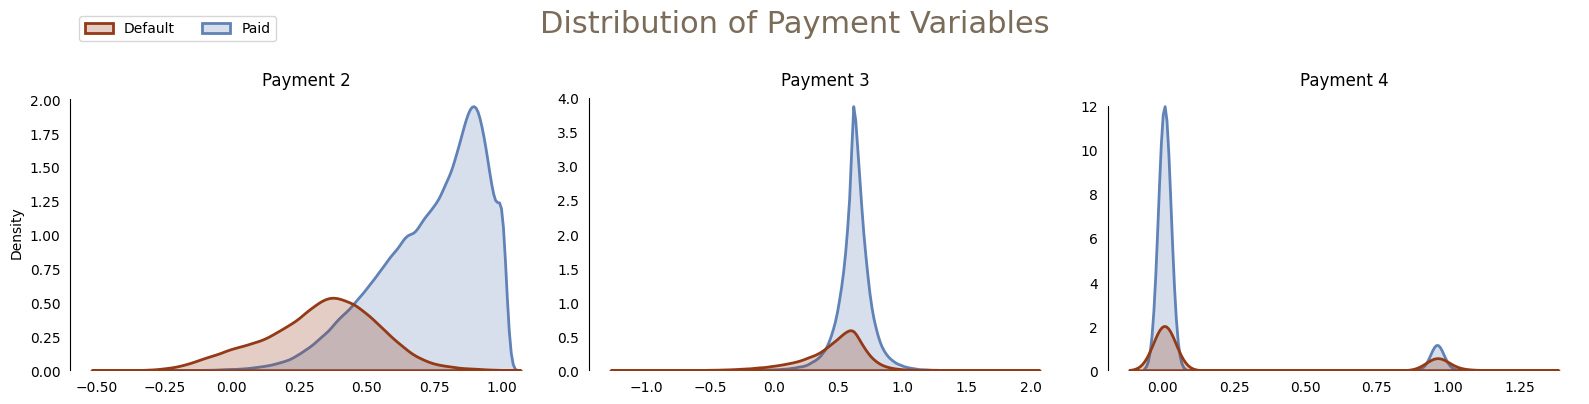

In [23]:
cols=[col for col in train.columns if (col.startswith(('P','T'))) & (col not in cat_cols[:-1])]
plot_df=train[cols]
get_the_kde_plot(1, 3, (16, 5), cols, plot_df, "Distribution of Payment Variables", 22)

The Probability Density Function (PDF) provides a visual representation of the distribution of a continuous random variable. By analyzing the PDF, you can draw several conclusions about the underlying data:

1. **Central Tendency:** The location of the peak(s) of the PDF can give an indication of the central tendency of the data, often representing the mode of the distribution.

1. **Spread/Variability:** The width of the PDF provides insights into the variability or spread of the data. A wider distribution indicates more variability, while a narrower distribution indicates data points are clustered closely around the mean.

1. **Symmetry/Skewness:** If the PDF is symmetric around its central value, the distribution is symmetric. If one tail is longer than the other, the distribution is skewed. A longer right tail indicates positive skewness, while a longer left tail indicates negative skewness. The KDE can give insights into the skewness of the data — whether the distribution is symmetric, right-skewed, or left-skewed. It can also provide a sense of the "heaviness" of the tails of the distribution, which can be important in risk assessment in fields like finance.

1. **Kurtosis:** The "tailedness" or the extremity of the tails of the PDF can provide insights into the kurtosis of the distribution. Heavy tails might suggest a higher likelihood of outliers.

1. **Multimodality:** Multiple peaks in the PDF suggest that the data might have multiple modes, which could indicate the presence of distinct groups or clusters within the data.

1. **Outliers:** Any small bumps or spikes in the tails of the PDF might suggest potential outliers or rare events.

1. **Known Distributions:** By comparing the shape of the PDF to known distributions (e.g., normal, exponential, etc.), you can hypothesize about the underlying process generating the data. For instance, a bell-shaped PDF might suggest the data is normally distributed.  One of the most immediate insights gained from a KDE is the shape of the data's distribution. You can quickly determine if the data is normally distributed, bimodal (two peaks), multimodal (multiple peaks), or has some other form.

1. **Domain-Specific Insights:** In some fields, the shape of the distribution can provide specific insights. For instance, in finance, a "fat-tailed" distribution might indicate a higher than expected likelihood of extreme market events.

1. **Comparison Between Groups:** If you have PDFs of multiple groups or categories, comparing their shapes can provide insights into differences between the groups. For instance, comparing the income distributions of two countries might reveal differences in equality.

1. **Data Transformation Clues:** If you're aiming to apply techniques that assume normality, the PDF can guide you on necessary data transformations. For instance, if the data is log-normally distributed, taking the logarithm might make it more normally distributed.

1. **Identify Gaps:** Sometimes, the PDF might reveal clear gaps or regions where data is sparse, indicating potential areas of missing data or simply areas of low probability.

It's worth noting that while the PDF provides a lot of insights, it's often beneficial to couple it with other statistical measures (like mean, median, standard deviation, skewness, kurtosis, etc.) and plots (like box plots, CDFs, etc.) to get a comprehensive understanding of the data's distribution. Also, always consider the context and domain when interpreting the PDF; what's meaningful in one scenario or field might be different in anothe

KDE plots are especially useful when comparing the distributions of two or more groups on the same axis. For instance, if you're analyzing a dataset of test scores for two different teaching methods, overlaying the two KDEs can immediately show differences in distributions. When visualizing Kernel Density Estimation (KDE) plots of continuous variables for a binary classification problem, such as credit card default prediction, comparing the two distributions (one for each target value: default vs. no default) can yield various insights. Here's what you might conclude from such plots:

1. **Feature Discrimination:** If the two distributions (default vs. no default) are distinctly separate for a given feature, it indicates that the feature is potentially very useful in discriminating between the two classes. A feature with overlapping distributions might be less informative, though it could still offer some value in combination with other features.

1. **Thresholds for Decision Making:** If a clear separation exists between the two distributions, you can identify threshold values of the feature that might indicate higher risk. For example, if the distribution of 'credit limit' is significantly lower for defaulters than non-defaulters, a low credit limit might be a risk indicator.

1. **Risk Patterns:** Some features might show that as their value increases or decreases, the likelihood of default changes. For instance, if a KDE plot of 'monthly expenditure' shows that higher expenditures correlate with higher default rates, it suggests a pattern that can inform risk assessment.

1. **Data Quality Issues:** Anomalies in the KDE plots, such as unexpected spikes, might indicate issues with data quality, recording errors, or outliers.

1. **Multimodal Distributions:** If any of the continuous features show multiple peaks (modes) in their KDE plots, it suggests underlying sub-groups within the data. Investigating these sub-groups might reveal specific behaviors or patterns. For instance, a multimodal distribution in 'age' might indicate different default behaviors across age groups.

1. **Skewness & Symmetry:** If the distributions are skewed (either left or right), it might indicate that certain ranges of the feature values are more prone to defaults. For example, if the distribution of 'balance amounts' is right-skewed for defaulters, it indicates that people with higher balances are fewer but have a higher tendency to default.

1. **Comparative Analysis:** For some features, you might find that the distribution for defaulters closely mirrors that for non-defaulters but is simply shifted up or down the value axis. This could indicate that while the general pattern of behavior is the same for both groups, the scale of the behavior (e.g., amount spent, frequency of use) differs.

1. **Feature Engineering Ideas:** Observing the patterns and behaviors in KDE plots can inspire ideas for feature engineering. For instance, if you find that defaults are higher for very low and very high credit limits but lower for mid-range limits, you might engineer a feature that captures this non-linear relationship.

1. **Validation of Hypotheses:** The KDE plots can help validate or refute domain-specific hypotheses. For instance, if there's a belief that people with very recent credit inquiries are more likely to default, the KDE plots can provide evidence for or against this belief.

When analyzing KDE plots (or any visualization, for that matter), it's crucial to approach the analysis with a combination of domain knowledge, statistical understanding, and a dose of skepticism. Always consider external factors, potential biases in the data, and the broader context when drawing conclusions.




## Correlation heatmap, EDA for Numerical Features.


Before we dive in into distributions of the individual features let's check are there any highly correlated ones.

**What is Correlation Heatmap?**

Correlation heatmaps are a type of plot that visualize the strength of relationships between numerical variables. Correlation plots are used to understand which variables are related to each other and the strength of this relationship. A correlation plot typically contains a number of numerical variables, with each variable represented by a column. The rows represent the relationship between each pair of variables. The values in the cells indicate the strength of the relationship, with positive values indicating a positive relationship and negative values indicating a negative relationship. Correlation heatmaps can be used to find potential relationships between variables and to understand the strength of these relationships. In addition, correlation plots can be used to identify outliers and to detect linear and nonlinear relationships. The color-coding of the cells makes it easy to identify relationships between variables at a glance. Correlation heatmaps can be used to find both linear and nonlinear relationships between variables.

Warmer colors (like red) typically represent positive correlations, cooler colors (like blue) represent negative correlations, and colors close to white or gray indicate little to no correlation.

For numerical variables, the most commonly used correlation coefficient is the Pearson correlation coefficient. It measures the linear relationship between two numerical variables. The coefficient ranges from -1 to 1:

- 1: Perfect positive correlation.
- -1: Perfect negative correlation.
- 0: No linear correlation.


**Benefits of a Correlation Heatmap:**

1. **Visual Overview**: It offers a quick visual overview of the relationships among multiple variables, enabling you to spot potential patterns, outliers, or areas of interest.

1. **Identifying Multicollinearity:** Before building regression models, it's crucial to check for multicollinearity (when two or more variables are highly correlated). A heatmap can help quickly identify these variables.

1. **Feature Selection:** When building models, it might be beneficial to remove variables that are highly correlated, as they carry similar information.

1. **Insights for Further Analysis:** Identifying which variables are strongly correlated can guide further analyses, hypothesis tests, or feature engineering.

However, remember:

1. **Correlation ≠ Causation:** Just because two variables are correlated doesn't mean one causes the other.

1. **Linearity Limitation:** Pearson's correlation coefficient measures only linear relationships. Nonlinear relationships might not be well-represented by the coefficient. In such cases, other correlation measures like Spearman's rank correlation might be more appropriate


In statistics, the **Pearson correlation coefficient (PCC)** is a correlation coefficient that measures linear correlation between two sets of data. The Pearson correlation coefficient is a descriptive statistic, meaning that it summarizes the characteristics of a dataset. Specifically, it describes the strength and direction of the linear relationship between two quantitative variables. The Pearson correlation coefficient is a descriptive statistic, meaning that it summarizes the characteristics of a dataset. Specifically, it describes the strength and direction of the linear relationship between two quantitative variables.

<img width="896" alt="image" src="https://github.com/eraikakou/LLMs-News/assets/28102493/52aec8ed-aeb5-4f93-a5b1-1f56e828ac82">
<img width="680" alt="image" src="https://github.com/eraikakou/LLMs-News/assets/28102493/21a535ed-0daa-4efd-8491-42bbb69b300a">

**Pearson correlation coefficient using `corr()`**

The Pearson correlation coefficient can be easily calculated in Pandas using corr(). The corr() function is used to compute pairwise correlation coefficients on Pandas dataframe values, and can either calculate them as individual pairs (i.e. top speed and price), or as pairs across an entire dataframe.

Since Pearson correlation coefficient is so widely used by statisticians and data scientists, the corr() function is pre-configured with default values to return the Pearson correlation coefficient. However, you can change this to use the similar Spearman rank correlation (or Spearman’s r), or the Kendall Tau correlation coefficient, if you think they better suit your data.


The `seaborn.heatmap()` function is just a visualization tool. It displays whatever matrix you provide to it. When it comes to correlations, whether the relationship is linear or not depends on the type of correlation coefficient you compute, not the heatmap itself.

Commonly used correlation coefficients include:

1. **Pearson Correlation Coefficient:** This measures the linear relationship between two numerical variables. When you use the corr() method from a pandas DataFrame, it computes the Pearson correlation by default. If your heatmap is based on this, then yes, it reflects linear relationships.

1. **Spearman Rank Correlation:** This measures the monotonic relationship between two variables. It's based on the rank values of the variables rather than their actual values. It's useful when the relationship might be nonlinear but still monotonic, or when dealing with ordinal data.

1. **Kendall's Tau:** Like Spearman, this is a rank-based correlation coefficient. It measures the strength of the association between two variables.

<img width="933" alt="image" src="https://github.com/eraikakou/LLMs-News/assets/28102493/5d6d5da3-b462-4ac3-937f-d34bdf859a96">

To visualize non-linear relationships in a heatmap using `seaborn`, you'd first compute the desired correlation matrix (e.g., Spearman's correlation) and then plot it:



***What is multicolinearity and why is it bad?***

Multicolinearity happens when two or more features in a model are correlated with one another. For example, if I want to build a regression model to predict the likelihood of catching a particular disease and I include inputs “history of disease A in the past 12 months” and “history of any disease in the past 12 months,” you can see how a positive outcome in the first input directly correlates to a positive outcome in the second. This creates a case called multi-colinearity. When this occurs, the integrity of the model is compromised because the two inputs are not independent of each other and thus the model cannot distinguish the significance of either in predicting the target outcome.

**Conclusions and Insights You Can Draw:**

1. There are several highly correlated Delinquency variables, with a few pairs perfectly positively correlated at 1.0. There are also a number of missing correlations, due to null values in the data. Below are the relationships between some of the most correlated Delinquency variables.



In [24]:
def get_the_correlation_heatmap_plot(plot_df: pd.DataFrame, fig_size: Tuple[int, int], title: str, title_fontsize: int, cbar: bool = False) -> None:
    """Generates a heatmap visualizing the pairwise correlation of columns in a DataFrame.

    Parameters:
        plot_df (pd.DataFrame): DataFrame for which the correlations will be computed.
        fig_size (Tuple[int, int]): Size of the figure to be plotted (width, height).
        title (str): Title of the heatmap.
        title_fontsize (int): The fontsize of the title
        cbar (bool, optional): Whether to display a color bar on the heatmap. Default is False.

    Returns:
        None: The function displays the heatmap.
    """
    corr=plot_df.corr()

    # It creates a boolean array of the same shape as corr filled with True
    # It returns the upper triangle of the array (it makes the lower triangle False)
    mask = np.triu(np.ones_like(corr, dtype = bool))[1:,:-1]

    # This line slices the corr DataFrame to exclude its first row and last column. 
    # This aligns it with the mask created in the previous step.
    corr=corr.iloc[1:,:-1].copy()

    fig, ax = plt.subplots(figsize=fig_size)   
    sns.heatmap(
        corr, 
        mask=mask, 
        vmin=-1, 
        vmax=1,
        center=0, 
        annot=True, 
        fmt=".2f", 
        cmap="coolwarm", 
        annot_kws={
            "fontsize":10,
            "fontweight":"bold"
        },
        cbar=cbar
    )
    ax.tick_params(left=False,bottom=False)
    ax.set_xticklabels(ax.get_xticklabels(), rotation=45, horizontalalignment='right',fontsize=12)
    ax.set_yticklabels(ax.get_yticklabels(), fontsize=12)
    plt.title(title, fontsize=title_fontsize,  color="#7b6b59")

    plt.show()
    plt.close()

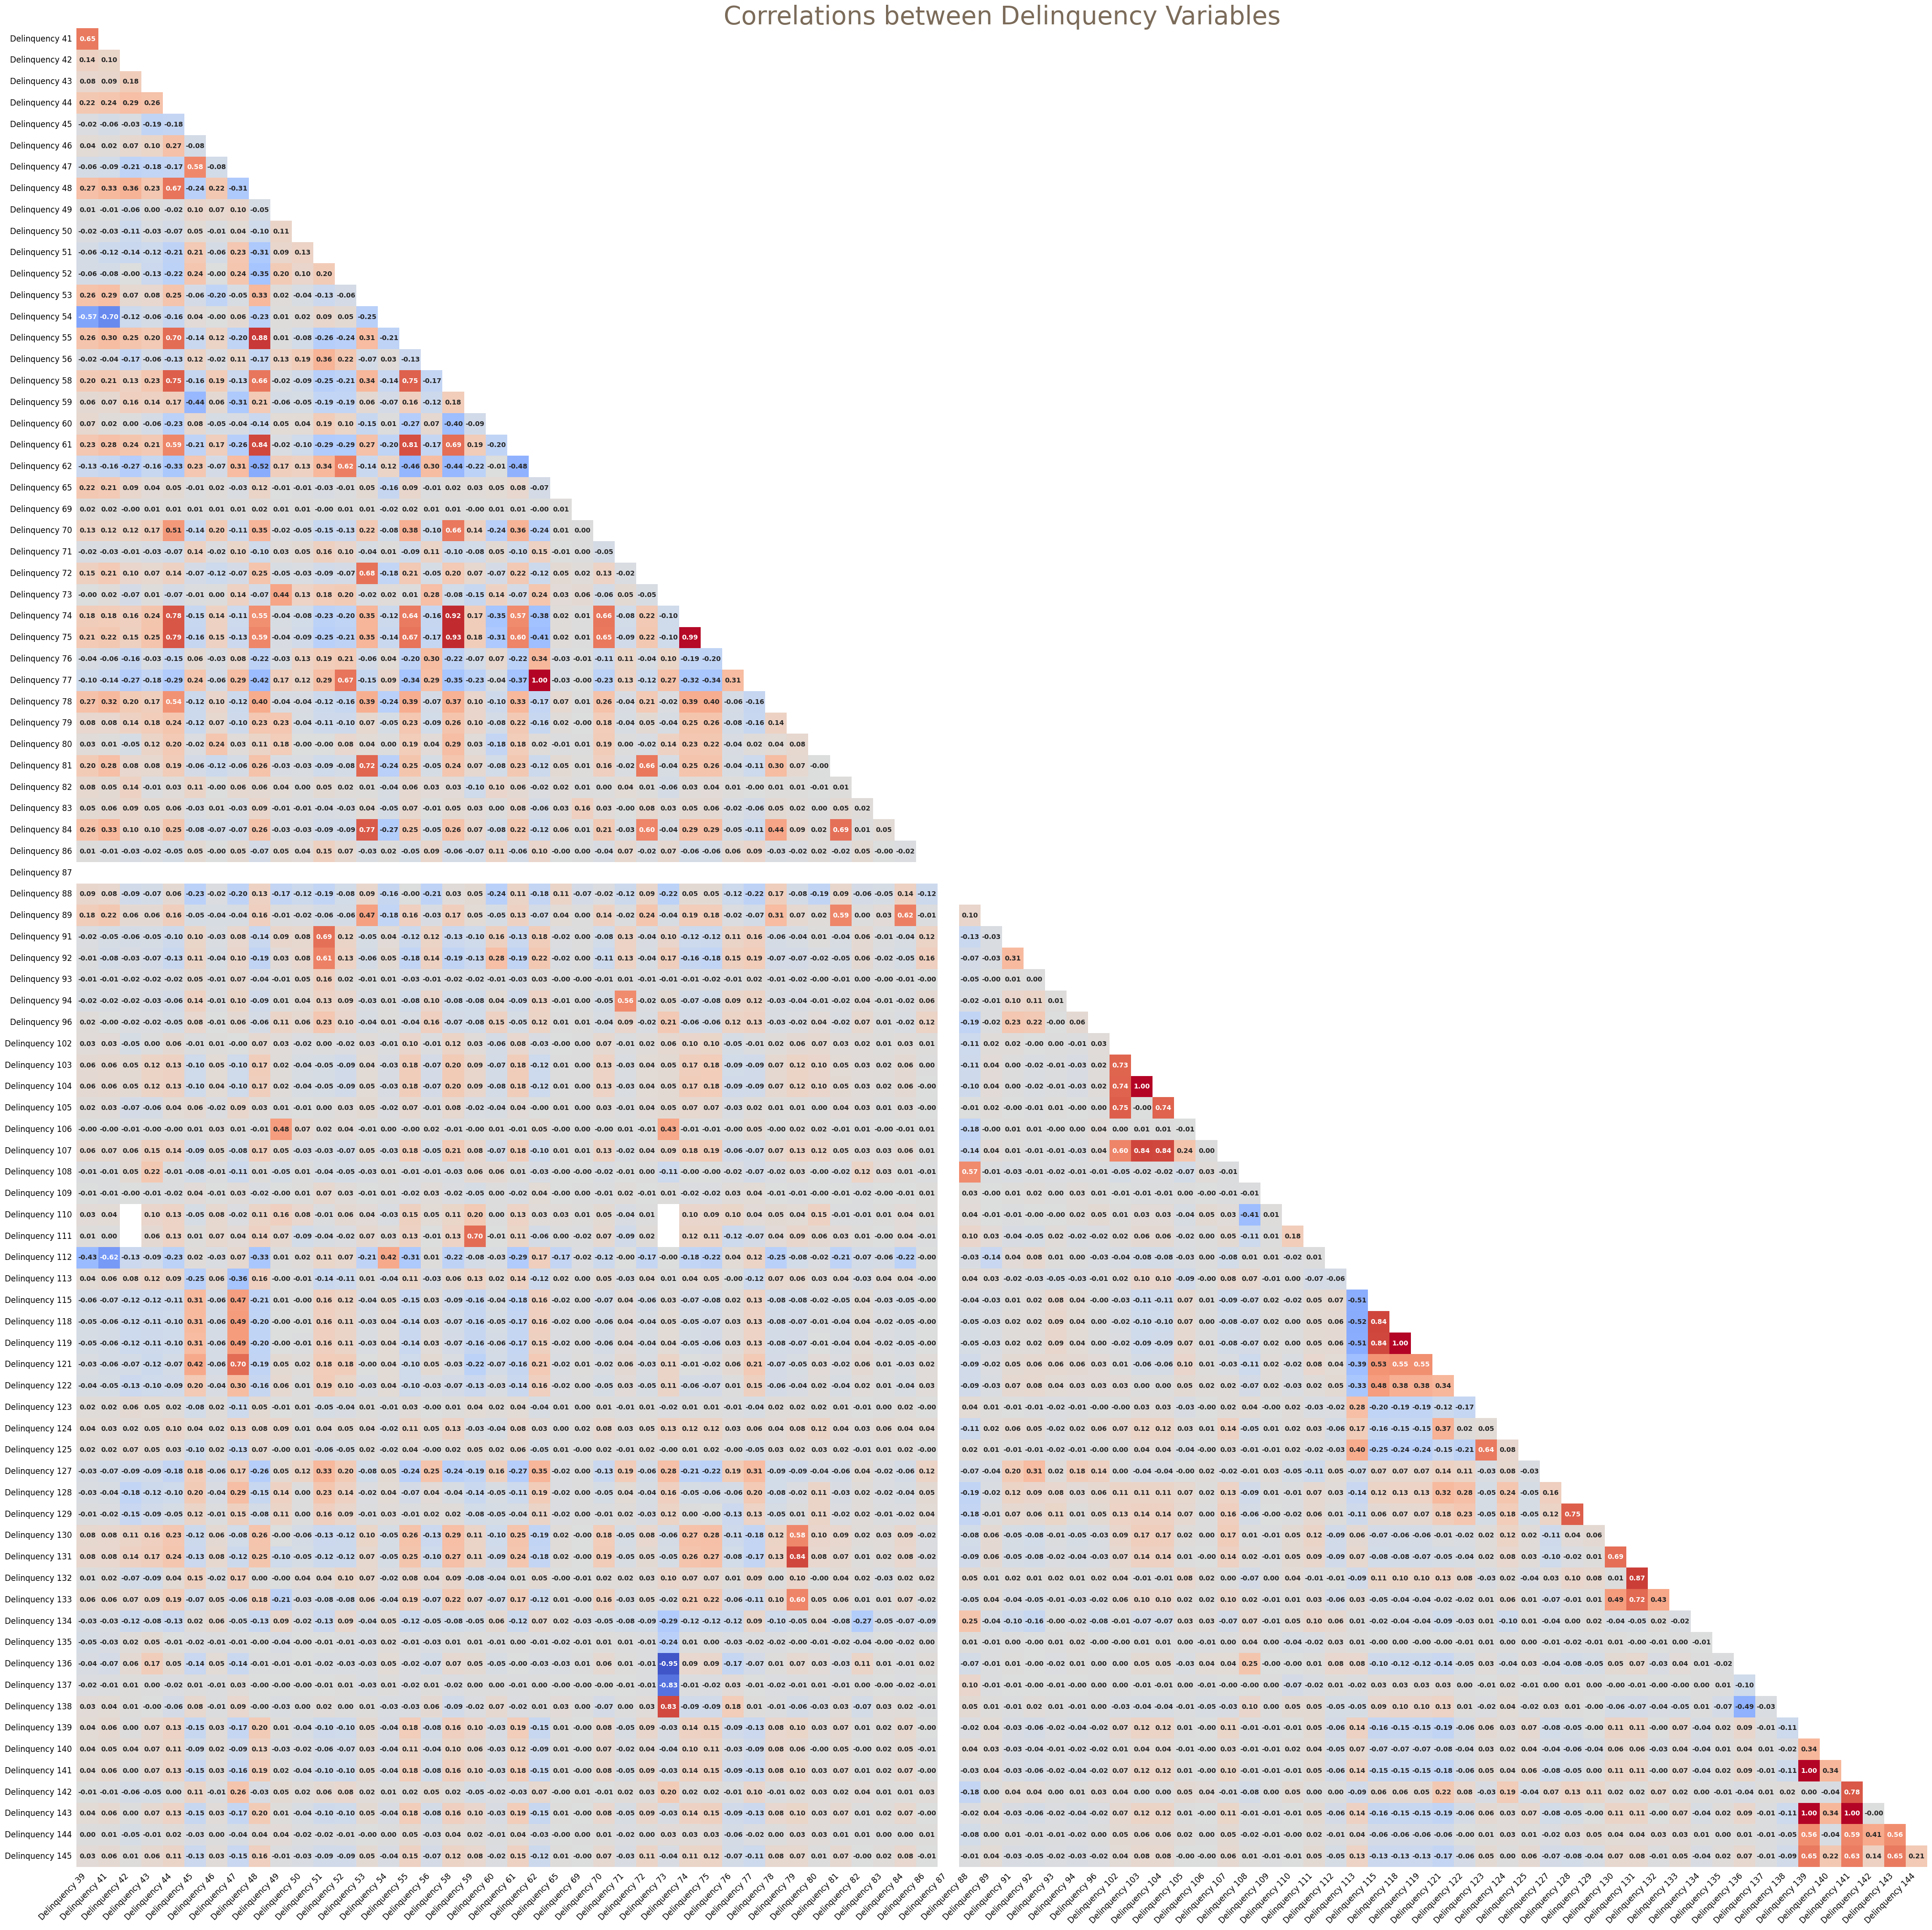

In [25]:
delinquency_cols = [col for col in train.columns if (col.startswith(("D"))) & (col not in cat_cols)]
plot_df=train[delinquency_cols]
get_the_correlation_heatmap_plot(plot_df, (50,50), "Correlations between Delinquency Variables", 38)

Τhere are several highly correlated Delinquency variables, with a few pairs perfectly positively correlated at 1.0. There are also a number of missing correlations, particularly in `Delinquency 87`, due to null values in the data.

/tmp/ipykernel_20/3797084343.py:14: FutureWarning:

The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.



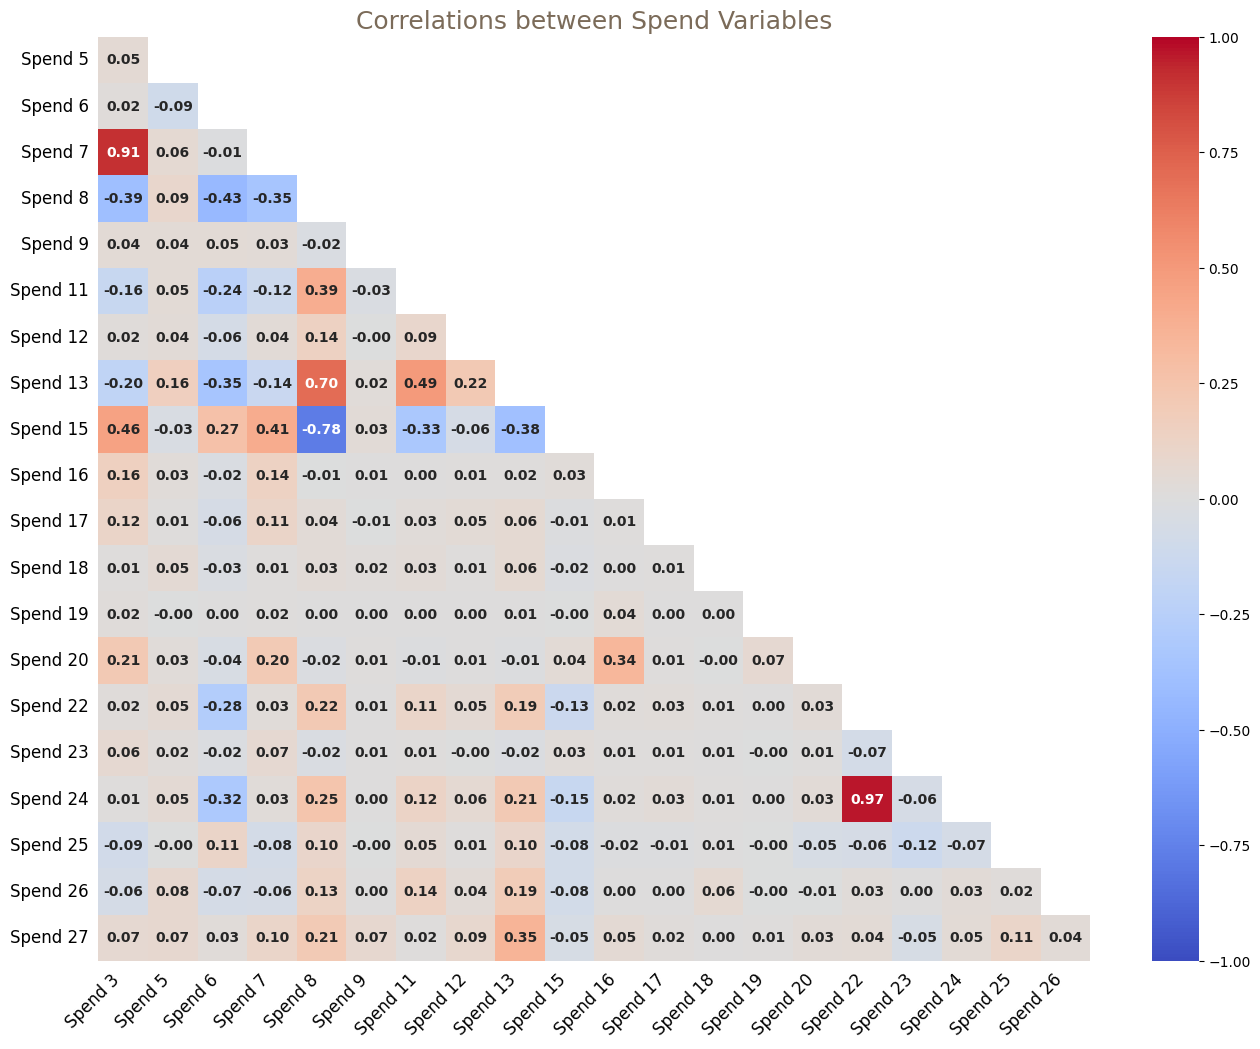

In [26]:
spend_cols = [col for col in train.columns if (col.startswith(("S"))) & (col not in cat_cols)]
plot_df=train[spend_cols]
get_the_correlation_heatmap_plot(plot_df, (16,12), "Correlations between Spend Variables", 18, True)

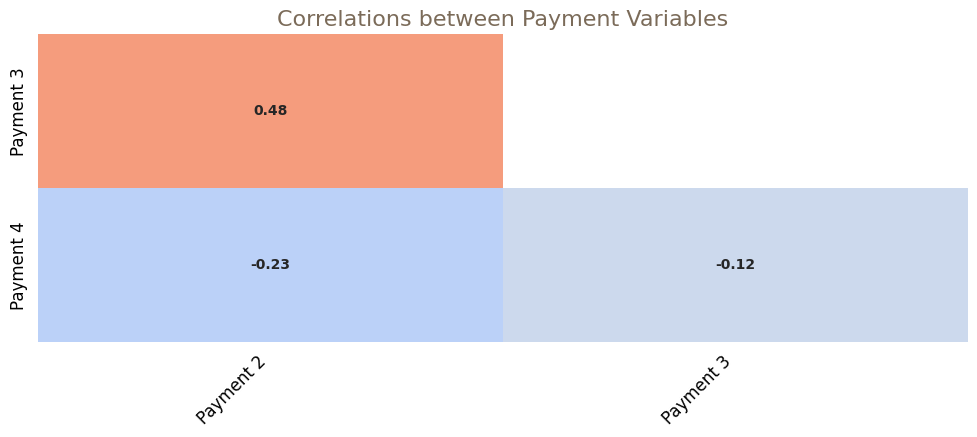

In [27]:
payment_cols = [col for col in train.columns if (col.startswith(("P"))) & (col not in cat_cols)]
plot_df=train[payment_cols]
get_the_correlation_heatmap_plot(plot_df, (12,4 ), "Correlations between Payment Variables", 16)

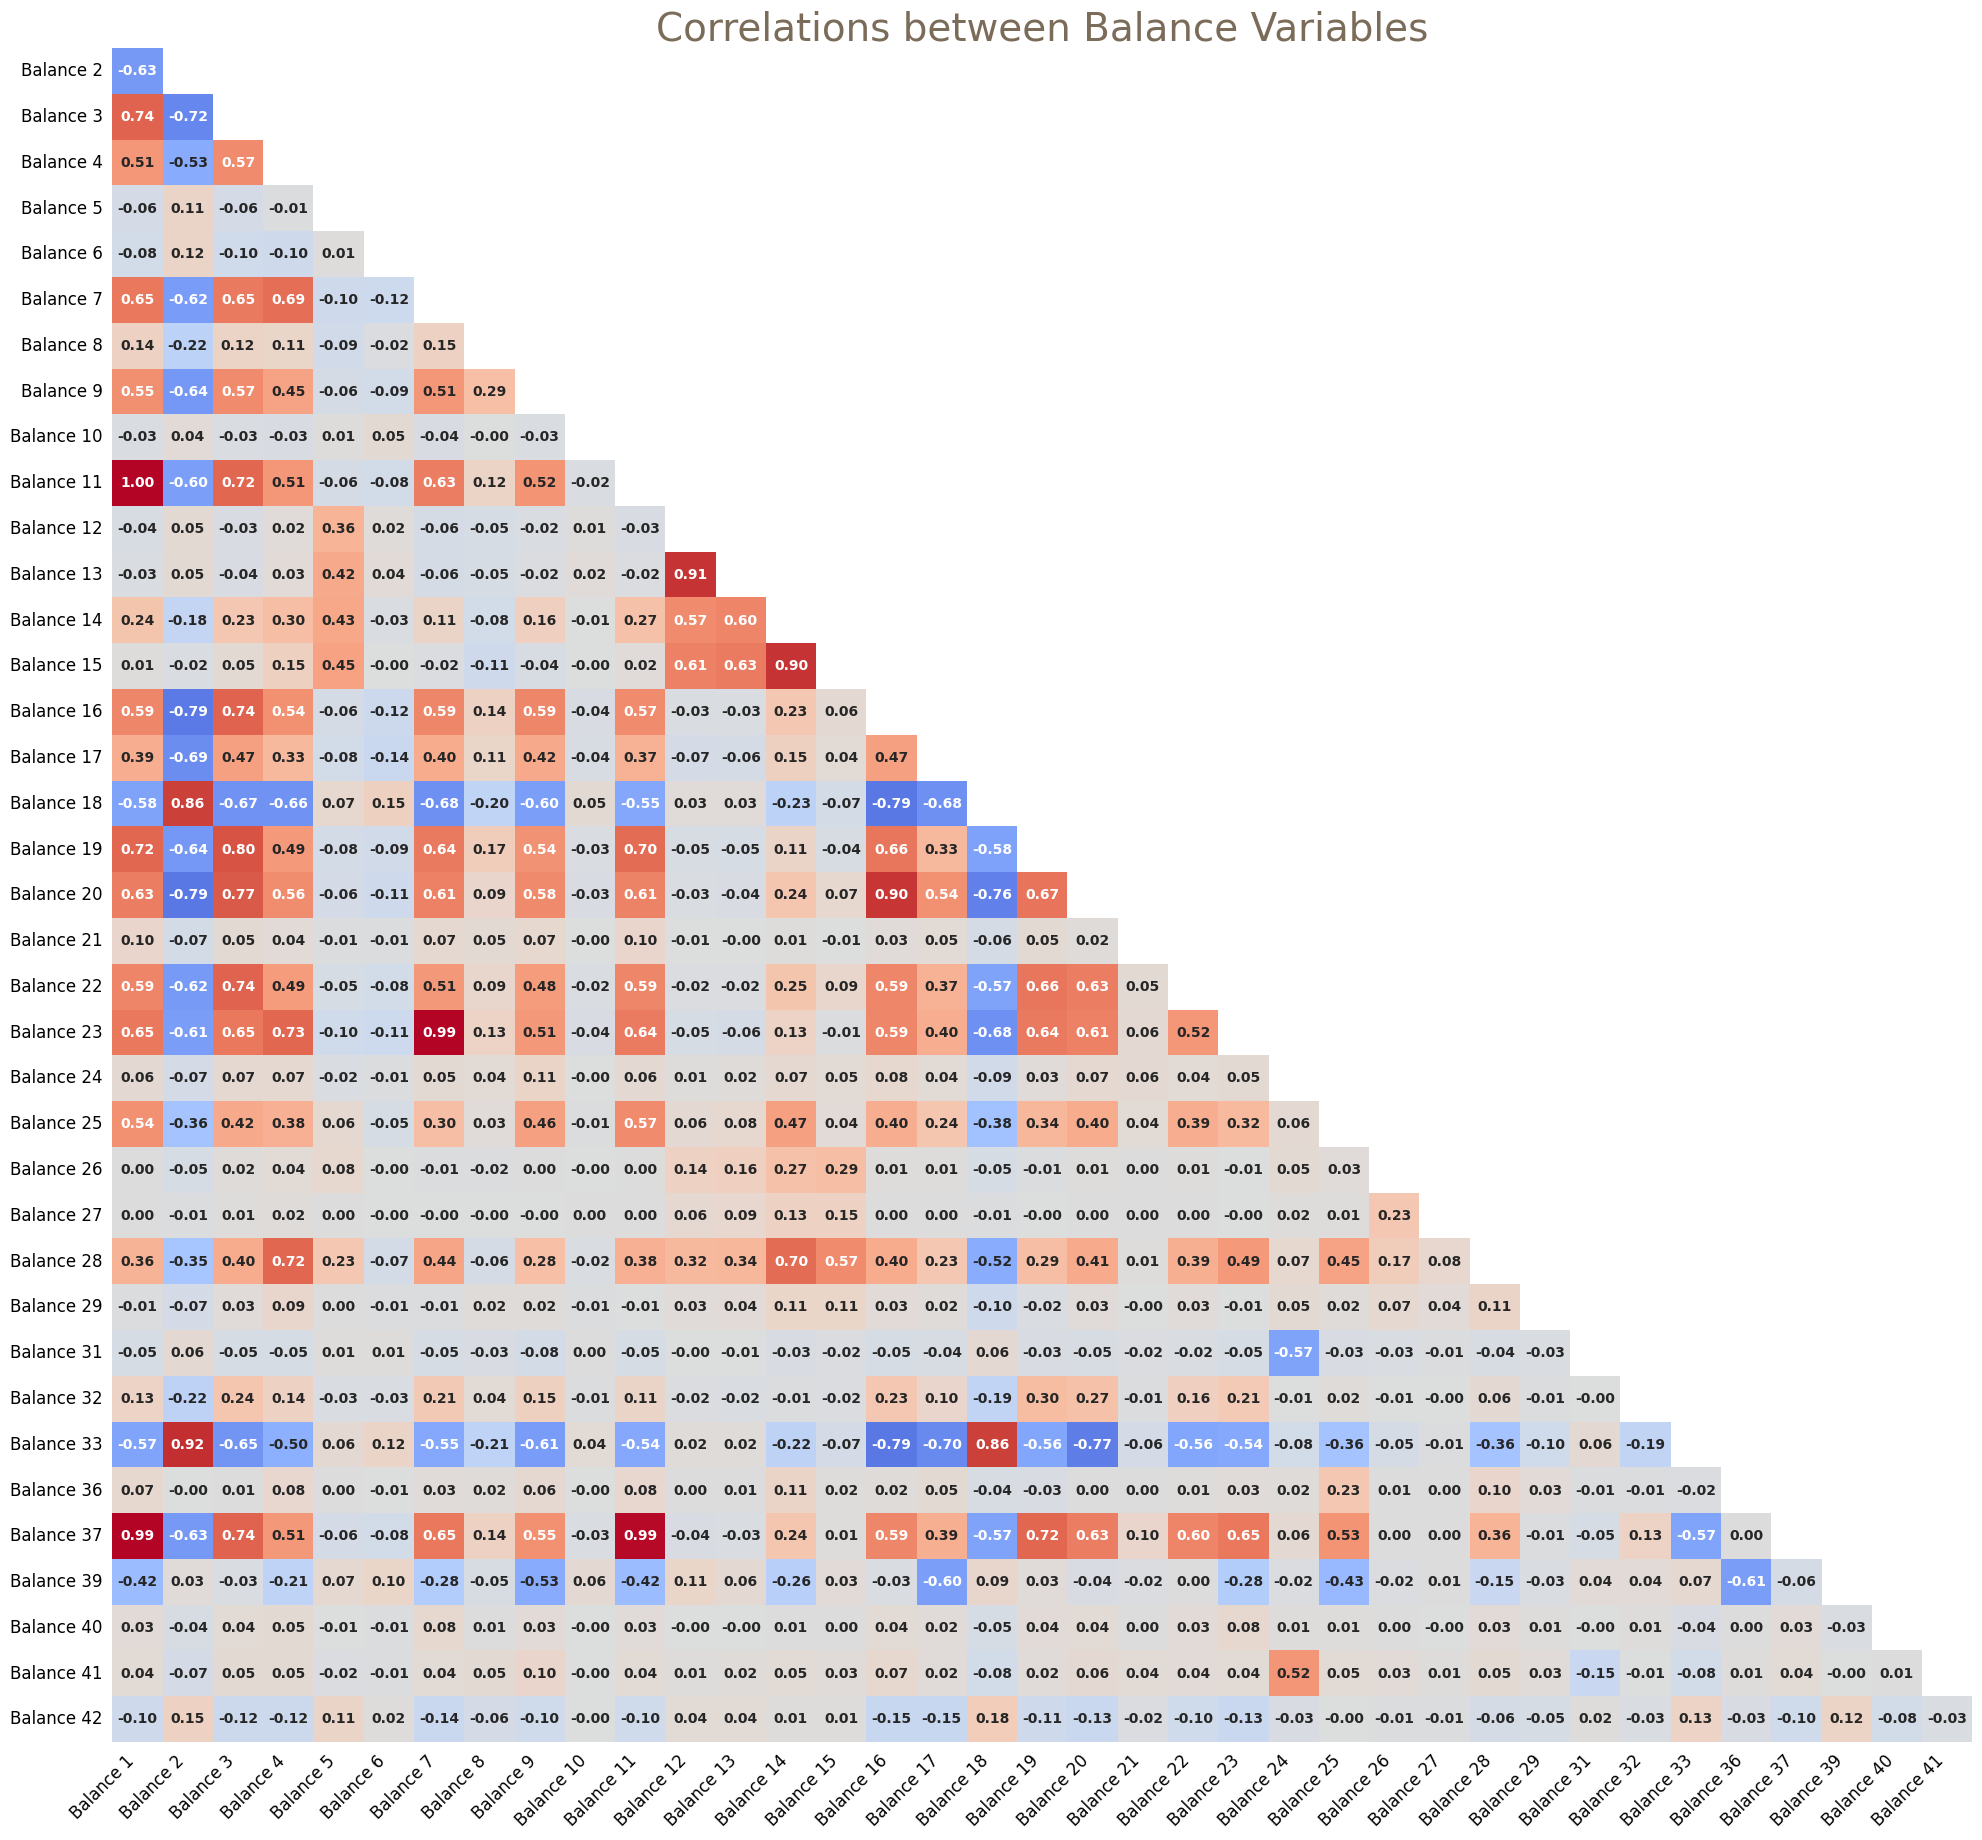

In [28]:
balance_cols = [col for col in train.columns if (col.startswith(("B"))) & (col not in cat_cols)]
plot_df=train[balance_cols]
get_the_correlation_heatmap_plot(plot_df, (24,22), "Correlations between Balance Variables", 28)

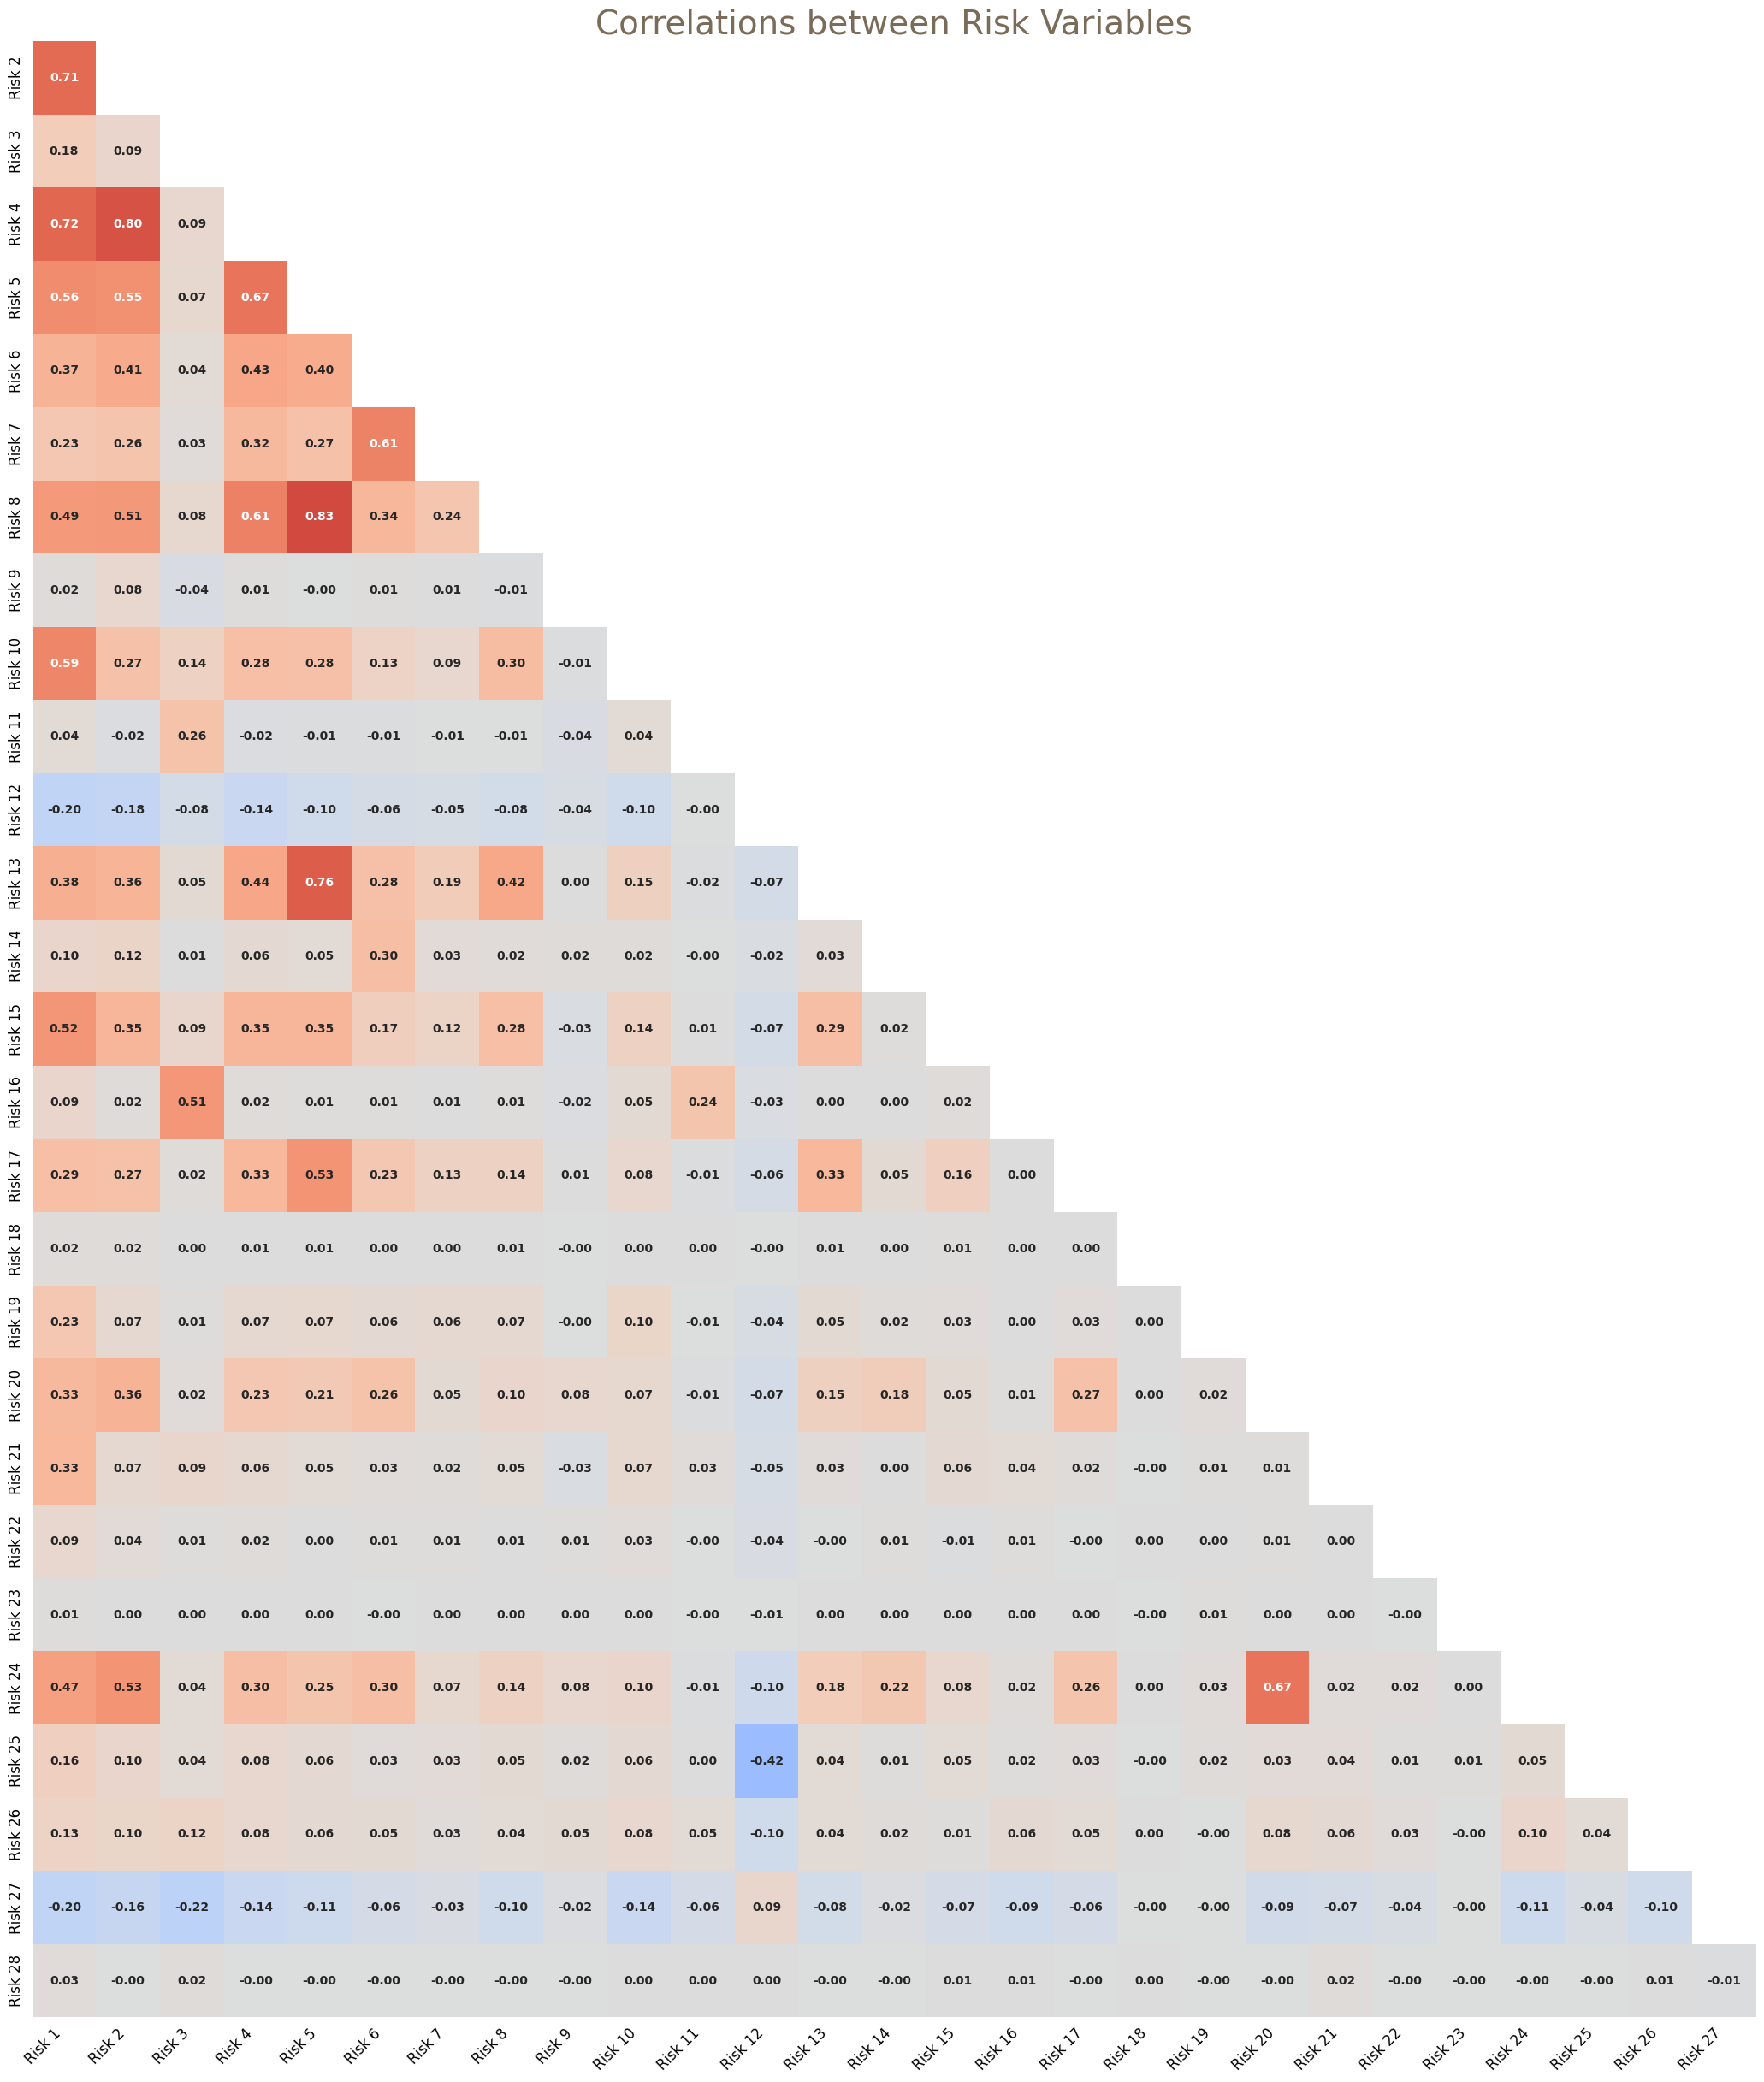

In [29]:
risk_cols = [col for col in train.columns if (col.startswith(("R"))) & (col not in cat_cols)]
plot_df=train[risk_cols]
get_the_correlation_heatmap_plot(plot_df, (26,30), "Correlations between Risk Variables", 28)

## Correlation with the target.

**Correlation and Causation**

1. **Correlation:** A measure of the extent of interdependence between variables.
1. **Causation:** the relationship between cause and effect between two variables.

It is important to know the difference between these two. Correlation does not imply causation. Determining correlation is much simpler than determining causation as causation may require independent experimentation. While causation and correlation can exist simultaneously, correlation does not imply causation. Causation means one thing causes another—in other words, action A causes outcome B. On the other hand, correlation is simply a relationship where action A relates to action B—but one event doesn’t necessarily cause the other event to happen.

<img width="1121" alt="image" src="https://github.com/eraikakou/LLMs-News/assets/28102493/c7a7b0c5-4bc2-412c-abbd-baee82b5a20b">


Two or more variables considered to be related, in a statistical context, if their values change so that as the value of one variable increases or decreases so does the value of the other variable (although it may be in the opposite direction).

For example, for the two variables "hours worked" and "income earned" there is a relationship between the two if the increase in hours worked is associated with an increase in income earned. If we consider the two variables "price" and "purchasing power", as the price of goods increases a person's ability to buy these goods decreases (assuming a constant income).

Correlation is a statistical measure (expressed as a number) that describes the size and direction of a relationship between two or more variables. A correlation between variables, however, does not automatically mean that the change in one variable is the cause of the change in the values of the other variable.

Causation indicates that one event is the result of the occurrence of the other event; i.e. there is a causal relationship between the two events. This is also referred to as cause and effect.

Theoretically, the difference between the two types of relationships are easy to identify — an action or occurrence can cause another (e.g. smoking causes an increase in the risk of developing lung cancer), or it can correlate with another (e.g. smoking is correlated with alcoholism, but it does not cause alcoholism). In practice, however, it remains difficult to clearly establish cause and effect, compared with establishing correlation.



**Pearson Correlation**

The Pearson Correlation measures the linear dependence between two variables X and Y. The resulting coefficient is a value between -1 and 1 inclusive, where:

- 1: Perfect positive linear correlation.
- 0: No linear correlation, the two variables most likely do not affect each other.
- -1: Perfect negative linear correlation.

**Pearson Correlation is the default method of the function “corr”.**

Examining the correlation of each feature with the target variable can be very useful. Here's why it's beneficial and how we can achieve it:

1. **Feature Selection:** Features that have a higher correlation with the target variable might be more informative for prediction. Examining correlations can help prioritize which features to use in a model or even guide feature selection methods. In predictive modeling, we're interested in variables that have a relationship (linear or otherwise) with the target, regardless of whether one causes the other. A variable that's correlated with the target can be a good predictor, helping the model make more accurate predictions.

1. **Understanding Data Structure:** Knowing how different features relate to the target and to each other provides insights into the data's structure. This can guide data preprocessing, feature engineering, and model selection. By understanding which variables are strongly correlated with the target, we gain insights into potential relationships and patterns in the data. This can guide hypothesis generation and further research.

1. **Dimensionality Reduction:** If you have many features, correlation analysis can help identify the most relevant ones, allowing you to focus on those and potentially exclude others, reducing the complexity of your model.

1. **Statistical Significance:** While calculating correlations, it's also essential to evaluate the statistical significance of these correlations. High correlation coefficients may not always be statistically significant, especially when the sample size is small. Observing correlations can lead to hypotheses about potential causal relationships, which can then be investigated further using more robust causal inference methods or experiments.

1. **Informing Stakeholders:** Correlation plots and metrics are easily interpretable and can be shared with stakeholders to provide a high-level understanding of which variables might be important.

1. **Problem Framing:** Understanding which variables correlate with the target can help in framing the problem, deciding on the modeling approach, and determining which additional data might be helpful.

Correlation, especially Pearson correlation, captures linear relationships. Some variables might have a non-linear relationship with the target and might still be valuable despite a low correlation coefficient. Remember, while correlation indicates a linear relationship between variables, it does not imply causation. Furthermore, features that have low or zero correlation might still be important in the context of other variables, so simply discarding them based on low correlation can sometimes be premature. It's always beneficial to combine this analysis with domain knowledge and other feature selection methods.  Remember, while correlation does not mean causation, it does indicate a relationship. When we're building predictive models, we're often looking for relationships, not necessarily causal ones. For example, if we find that customers who visited a website frequently in the past week are more likely to make a purchase, it's useful information for prediction—even if frequent website visits don't cause the purchase. However, if we were looking to intervene and boost sales, understanding causation would be critical. For instance, if the real cause of increased sales is a popular product release, merely driving more website visits might not increase sales.

**Correlation and Feature importance**

Correlation with the target variable and feature importance from a model are distinct concepts, though both provide insights into the relationship between features and the target variable. Here's a breakdown of the differences:

**Correlation with Target:**

1. Nature: Measures linear (Pearson correlation) or monotonic (Spearman correlation) relationships between individual features and the target variable.
1. Scope: Considers each feature in isolation without accounting for potential interactions with other features.
1. Limitation: Just because a feature is not correlated with the target doesn't mean it's not important. The relationship could be complex or non-linear, which might not be captured by simple correlation metrics.

**Feature Importance from a Model:**

1. Nature: Derives importance based on how frequently a feature is used to split the data in tree-based models (like Decision Trees, Random Forests, or Gradient Boosted Trees) or based on coefficients in linear models, among other methods.
1. Scope: Takes into account the relationship between features and the target in the context of other features. It inherently captures feature interactions, especially in tree-based models.
1. Limitation: The interpretation can be model-specific. For example, feature importance in a random forest might differ from that in a boosted tree model. Additionally, correlated features can have distributed importances, where one feature might "hog" the importance that could have been shared with another related feature.

**Which to Use?**

- **Early EDA:** Correlation with the target is quick to compute and can provide early insights during exploratory data analysis (EDA).

- **Model Building:** Feature importance from models can help refine and optimize feature selection, especially when you're working with a large set of features.

- **Interpretation:** If you're trying to explain a model's predictions, feature importance can provide more nuanced insights, especially when used with tools like SHAP (SHapley Additive exPlanations) or permutation importance.

In practice, both correlation and feature importance can be valuable at different stages of a machine learning project. While correlation gives you a fast, model-agnostic overview, feature importance can offer deeper insights tailored to the specifics of the model you're using.

In [30]:
temp=dict(
    layout=go.Layout(
        font=dict(family="Franklin Gothic", size=12), 
        height=500, 
        width=1000)
)

# Computes the pairwise Pearson correlation of all columns in the dataframe train.
# 178 x 178, number of features = 190 but we excluded the categorical features
corr=train.corr()
# Filters the correlations to only those with the column Target,
# then sorts them in descending order, and
# excludes the correlation of Target with itself
corr=corr['Target'].sort_values(ascending=False)[1:]

# Uses Seaborn to create a reversed red color palette with 135 different shades.
pal=sns.color_palette("Reds_r",135).as_hex()
# Converts the hexadecimal colors in pal to RGB format (with added alpha transparency) using Matplotlib.
rgb=['rgba'+str(matplotlib.colors.to_rgba(i,0.7)) for i in pal]

fig = go.Figure()

fig.add_trace(
    go.Bar(
        x=corr[corr>=0],
        y=corr[corr>=0].index, 
        marker_color=rgb,
        orientation='h', 
        marker_line=dict(color=pal,width=2), 
        name='',
        hovertemplate='%{y} correlation with target: %{x:.3f}',
        showlegend=False
    )
)

pal=sns.color_palette("Blues",100).as_hex()
rgb=['rgba'+str(matplotlib.colors.to_rgba(i,0.7)) for i in pal]

# Adds the positively correlated features as horizontal bars to the figure using the colors defined earlier.
# Sets the orientation of the bars to horizontal, specifies hover information, 
# and ensures that these bars won't appear in a legend.
fig.add_trace(
    go.Bar(
        x=corr[corr<0], 
        y=corr[corr<0].index, 
        marker_color=rgb[25:], 
        orientation='h', 
        marker_line=dict(color=pal[25:],width=2), 
        name='',
        hovertemplate='%{y} correlation with target: %{x:.3f}',
        showlegend=False
    )
)

fig.update_layout(
    template=temp,
    title="Feature Correlations with Target",
    xaxis_title="Correlation", 
    margin=dict(l=150),
    height=3000, 
    width=700, 
    hovermode='closest' #ensures that the closest data point to the hover position will be shown in the hover label.
)
fig.show()


/tmp/ipykernel_20/3492255749.py:10: FutureWarning:

The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.



There are several strong correlations with the target variable. `Payment 2` is the most negatively correlated with the probability of defaulting with a correlation of -0.67, while `Delinquency 48` is the most positively correlated overall at 0.61. `Delinquency 87` is also missing from the correlations above due to the proportion of null values. 

## Random Uniform Noise Detected
 
**Context:**

Money has this unique property that values although highly cardinal it is still discrete with an increment of $0.01.

It can be expected that some debit cards would have a balance of $0.00 or credit cards maxed out the credit limit. Therefore spikes should appear in the money related feature distribution plots. It should be observed one way or another, even though the data has been anonymized & normalized (as per competition description).

Let's pick a random balance feature `Balance 2` and look at its distribution:


In [31]:
x = pd.read_csv('../input/amex-default-prediction/train_data.csv', usecols=['B_2'])

1. **Function:**

    - `sns.displot():` This is Seaborn's function to plot distributions. It's a figure-level function, meaning it creates a full figure.

1. **Parameters:**

    - `train['Balance 2']`: This specifies the data to be plotted, which in this case is the `Balance 2` column from the `train` dataframe.
    - `bins=500`: This divides the range of the data into 500 bins or intervals, and then counts the number of data points in each bin. The count in each bin is then represented by the height of the bar in the histogram. The larger the number of bins, the finer the granularity of the histogram, but if too large, it might also introduce noise.
    - `kde=False`: This specifies that the kernel density estimate (KDE) plot should not be overlaid on top of the histogram. By default, `displot` can also draw a KDE plot, but this parameter turns that feature off, so only the histogram is shown.

The output will be a histogram that shows the distribution of values in the `Balance 2` column, with the data divided into 500 bins. The x-axis will represent the range of values in `Balance 2`, and the y-axis will represent the count of data points in each bin.

/opt/conda/lib/python3.10/site-packages/seaborn/axisgrid.py:88: UserWarning:

The figure layout has changed to tight



<Figure size 1200x800 with 0 Axes>

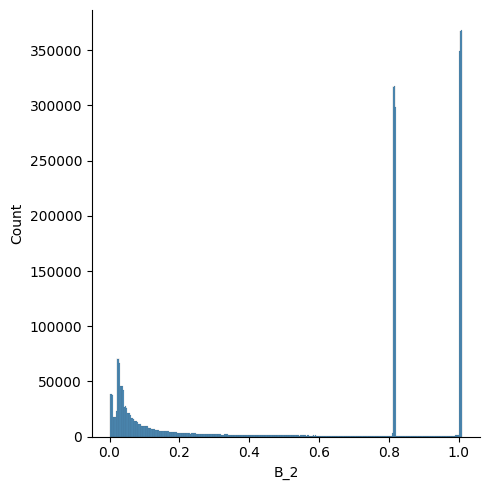

In [32]:
plt.figure(figsize=(12, 8))
sns.displot(x['B_2'], bins=500, kde=False)
plt.show()
plt.close()

Let's zoom in into these 2 spikes.

We can see that the spike is in range in (1, 1.01) and not a single value. I guess the max value for this feature in raw form is 1 and random uniform value from [0, 0.01] was added for each observation.



/opt/conda/lib/python3.10/site-packages/seaborn/distributions.py:2619: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



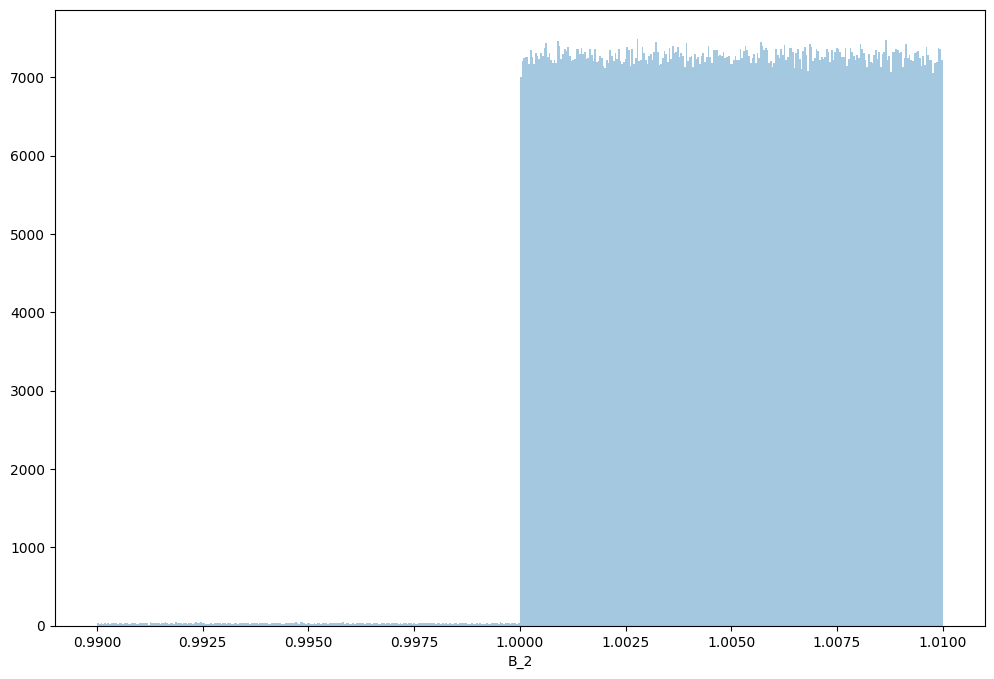

In [33]:
plt.figure(figsize=(12, 8))
sns.distplot(x.loc[x["B_2"]>0.99,"B_2"],bins=500,kde=False)
plt.show()
plt.close()

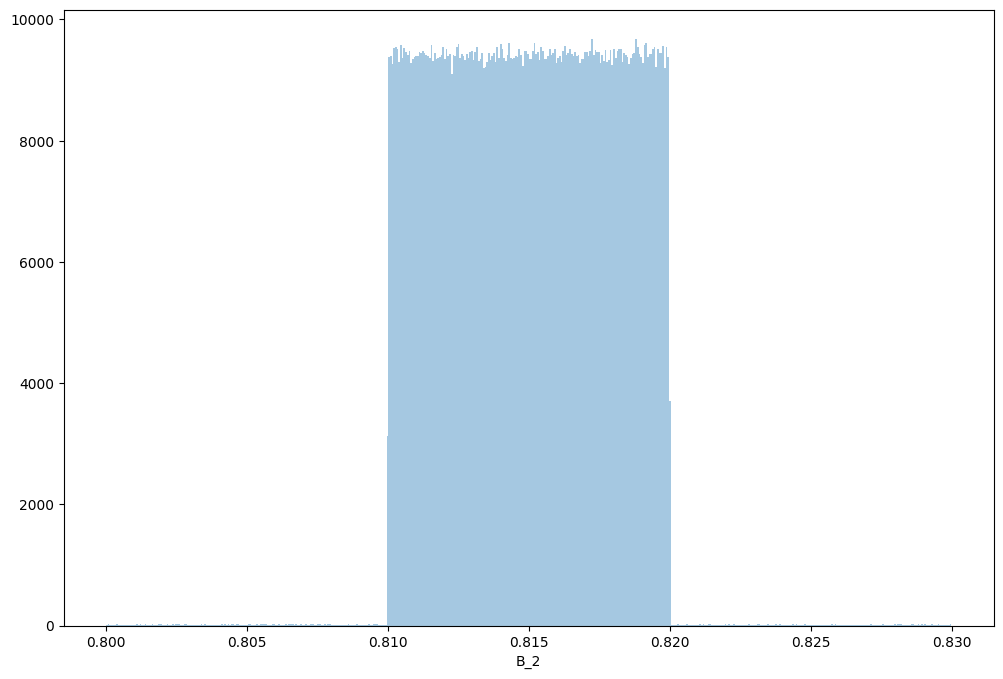

In [34]:
plt.figure(figsize=(12, 8))
sns.distplot(x.loc[(x.B_2>0.8) & (x.B_2<0.83),'B_2'],bins=500,kde=False)
plt.show()
plt.close()

The second spike confirms the idea of [0, 0.01] random uniform noise.

**The other way to look at it...**

99.9% values are unique. This goes against the nature of how maney is distributed in bank accounts. This confirms the hypothesis of random noise injection.



In [35]:
len(x['B_2'].unique())/len(x['B_2'])


0.9996357194522739

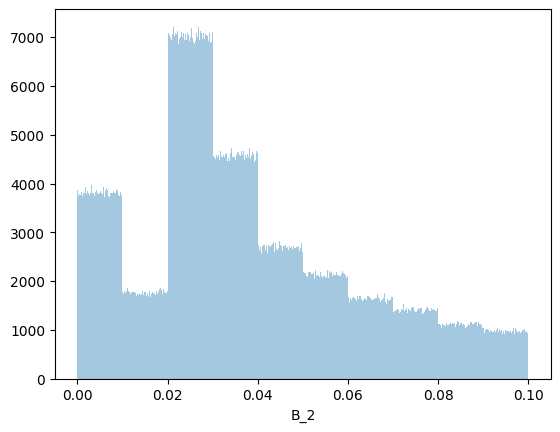

In [36]:
sns.distplot(x.loc[x.B_2<0.1,'B_2'],bins=500,kde=False)
plt.show()
plt.close()

## Monetary Variables:


The classification of money as a **discrete** or **continuous** variable can depend on the context in which it's being considered. Let's break it down:

1. In Practical Terms (**Everyday Transactions**): Money can be considered both, but physical money like banknotes and coins are definitely discrete. You can’t pay 1.243 USD. You can only pay 1.24 USD. That’s because the difference between two sums of money can be 1 cent at most. Money is typically treated as a discrete variable because it is quantized into specific units (e.g., pennies, cents, etc.). For example, in the U.S., you cannot have an amount smaller than 0.01USD for standard transactions. Hence, when considering everyday transactions or accounting, money is discrete. Money, especially in the context of most real-world transactions, behaves like a discrete variable. Let's use the U.S. dollar as an example: The smallest unit of the U.S. currency is the penny, which is worth 0.01 USD. Therefore, when dealing with standard transactions, all amounts must be a multiple of this smallest unit. This means you can have amounts like 0.01 USD, 0.02 USD, 0.03 USD, and so on, but not amounts like 0.015 USD or 0.025 USD in typical transactions.

    1. **Cardinality refers to the number of unique values a variable can take.**
        - **High cardinality** means there's a wide range of unique values.
        - **Low cardinality** means there are very few unique values.
        
        Money has high cardinality because, even within a small range, there are many possible values. For example, between 1 USD and 2 USD, you have 100 unique values.

1. In Theoretical or **Modeling Contexts**: Money can be treated as a continuous variable. For instance, when modeling economic phenomena, interest rates, or other financial metrics, it might be more convenient to treat money as continuous to allow for more nuanced calculations and predictions. In these scenarios, you might work with fractional pennies or cents, even if such values aren't practical in a real-world transaction.

1. **In Computing and Data Representation:** Even if treated as continuous in models, money's representation in computing systems can become discrete due to limitations in floating-point arithmetic. That's one reason financial systems often use integer arithmetic (counting cents rather than fractional dollars) to avoid rounding errors.

In summary, while money in practical, everyday scenarios is discrete, it can be treated as continuous in certain theoretical or modeling contexts. Always choose the representation that's most appropriate for the specific problem or analysis at hand.

## What Is Uniform Distribution?


In statistics, uniform distribution refers to a type of probability distribution in which all outcomes are equally likely.  A uniform distribution, also called a rectangular distribution, is a probability distribution that has constant probability.

This distribution is defined by two parameters, a and b:

- a is the minimum.
- b is the maximum.

Like all probability distributions for continuous random variables, the area under the graph of a random variable is always equal to 1.

<img width="936" alt="image" src="https://github.com/eraikakou/LLMs-News/assets/28102493/fcf21e79-43d8-4d25-9df4-2fa85260f29f">


## Anonymizing numerical data:


Anonymizing numerical data is essential to protect individuals' privacy when sharing datasets, especially in situations where the data can be personally identifiable or sensitive. Among several methods and techniques to anonymize numerical data one common technique is: 

1. **Random Noise Addition:** Random noise addition is a technique where you add a randomly generated value (noise) to each data point to obscure the original value, thus enhancing data privacy.

    - Add or subtract a small random number from each data point to mask the original value.
    - The noise should be generated from a known distribution, often a Gaussian (normal) distribution.
    - Ensure the noise doesn't drastically change the nature of the data.
    

## Random Uniform Noise:


**Why Add Noise?**

By adding random noise to data, individual data points get perturbed, making it difficult to identify or associate the information with any specific entity or individual. This helps in preserving privacy while still retaining, to an extent, the statistical properties of the dataset.

**Types of Noise:** There are several distributions from which you can generate noise. Two of the most commonly used are:

1. **Gaussian (or Normal) Noise:** This is noise generated from a normal distribution. The amount of noise added would be a random value typically centered around zero and with a defined standard deviation.

1. **Uniform Noise:** This is noise generated from a uniform distribution. For each data point, a random value is chosen from a fixed range, like [-a, a]. The uniform noise can take any value from this range with equal probability. Adding Uniform Noise: Let's discuss adding uniform noise in more detail. When you add uniform noise from a range [-a, a], you're effectively adding a random amount between -a and a to each data point. For example, if a = 2, then you're adding anywhere from -2 to 2 to each data entry. Steps to Add Uniform Noise:

    1. Determine the range of the noise. Decide how much perturbation is acceptable for your dataset. This will define the values of -a and a.

    1. For each numerical data point in your dataset, generate a random number from the uniform distribution defined by [-a, a].
    
    1. Add the generated random number to the data point.
    
    1. Repeat for all data points in your dataset.

**Considerations:**

1. The choice of the range [-a, a] is crucial. If the range is too small, the original data points remain almost identifiable, defeating the purpose of adding noise. If the range is too large, the perturbed data might lose a lot of its original utility and meaning.

1. Uniform noise addition can alter the statistical properties of your data, such as mean and variance. Depending on the range of noise and the distribution of your original data, these changes can be significant or minor.

1. While noise addition can provide some level of privacy, it's not foolproof, especially if an attacker has additional information or other means of cross-referencing data. It's essential to evaluate the risk based on the specific context of the data and its potential uses.

In summary, adding uniform noise can be a simple yet effective method for data anonymization, but care should be taken to ensure that the perturbed data retains its utility and that privacy requirements are met.


**Detecting uniform noise from a distribution plot (like a histogram or KDE) of a random variable can be challenging, especially if you don't have access to the original unperturbed data for comparison. However, there are some characteristics you might look for:**

1. **Uniform "Background" Noise:** If the original data had very discrete or specific values (e.g., only integers or specific categories) and a significant amount of uniform noise is added, then in a histogram, you might notice a "background" level of noise — a nearly uniform count across many bins, upon which the original data's pattern might be superimposed.

**The Nature of Uniform Noise:**

Uniform noise, when added to data, tends to spread data points evenly across a certain range. For instance, if you add uniform noise from the range [-0.5, 0.5] to a set of data points, you are effectively "jittering" or "shaking" those data points randomly, but within that specific range.

**Discrete Data:**

Imagine a dataset where values are very discrete, such as the number of times a person visits a store in a month. The values might be integers like 0, 1, 2, 3, etc. If you were to create a histogram of this data, you'd see bars at these integer positions, and zero (or near zero) counts in between these integers.

**Adding Uniform Noise:**

Now, let's add uniform noise from the range [-0.5, 0.5] to this discrete data. Some of the original values will be reduced by up to 0.5, some will be increased by up to 0.5, and some will change by some value in between. This means that a value that was originally 2 could now be anywhere between 1.5 and 2.5.

**Effect on the Histogram:**

After adding the noise, if you plot a histogram of this "noisy" data, you won't just see bars at the integer positions. Instead:

The bars at the integer positions will likely be shorter than before because some of the data points have been "pushed" into the neighboring bins by the noise.
You'll see new bars appearing between the integers. These bars represent the data points that have been "jittered" away from their original integer positions by the noise.
The bars between the integers will be of roughly equal height, creating a sort of "background" level in the histogram. This is because the noise is uniform and spreads data points evenly in its range.
This consistent, roughly equal-height "background" is superimposed on the original pattern of the data (the spikes at integer positions). It's like the original, clean data is trying to "peak through" this added noise.

**Why it's called "Background" Noise:**

The term "background" is used here to give an intuitive sense of something that's pervasive and ever-present, like a backdrop. In this context, because the noise spreads data points somewhat evenly between discrete values, it gives rise to a consistent "background" level in a histogram.

**In Conclusion:**

When you see a histogram with expected spikes (from the original, clean data) combined with an unexpected, nearly uniform distribution in between those spikes, it can be an indicator of added uniform noise. This is especially noticeable when the original data had very discrete or specific values.